# Project1 Yuchen Feng

In [1]:
# !pip install rpy2

In [2]:
#library to use R in Python 
import rpy2

import warnings
warnings.filterwarnings('ignore')

from rpy2.robjects import pandas2ri
import rpy2.rinterface as rinterface
pandas2ri.activate()

%load_ext rpy2.ipython

In [3]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [4]:
data = pd.read_csv('/Users/hongtingfei/Desktop/MQE/2022-2023Fall/Econ430/HousePrice.csv').dropna()

In [5]:
data['price']=data['price']/1000000

In [6]:
data.head()

,DATE,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,7/3/14 0:00,0.5900,3,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0
1,6/23/14 0:00,12.8990,3,2.50,2190,11394,1.0,0,0,3,1550,640,1956,2001
2,6/11/14 0:00,7.0625,5,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001
3,6/17/14 0:00,4.6680,5,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009
4,6/18/14 0:00,4.4890,4,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0


In [7]:
data.drop(['DATE'], axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.5900,3,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0
1,12.8990,3,2.50,2190,11394,1.0,0,0,3,1550,640,1956,2001
2,7.0625,5,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001
3,4.6680,5,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009
4,4.4890,4,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.0000,2,2.25,2130,4920,1.5,0,4,4,1530,600,1941,1998
4596,0.0000,4,2.50,4080,18362,2.0,0,2,4,4080,0,1983,0
4597,0.0000,3,1.00,1520,9030,1.0,0,0,3,1520,0,1956,2001
4598,0.0000,5,6.25,8020,21738,2.0,0,0,3,8020,0,2001,0


In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.546311,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,0.412867,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,0.322875,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,0.460944,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,0.654238,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,12.899000,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 503.2+ KB


## Question 1 Descriptive Analysis
### (a)

In [10]:
# Specify the Model
mr_mod = smf.ols(formula='price ~ bedrooms + bathrooms + sqft_living+sqft_lot+floors+waterfront+view+condition+sqft_above+sqft_basement+yr_built+yr_renovated', data=data)

# Fit the Model
mr_fit = mr_mod.fit()
# Type: dir(ols_fit) to look at other accessible attributes

# Look at the Model Fit Summary
#print(mr_fit.summary())

In [11]:
# Specify the Model
mr_mod = smf.ols(formula='price ~  sqft_living+sqft_above+sqft_basement', data=data)

# Fit the Model
mr_fit = mr_mod.fit()
# Type: dir(ols_fit) to look at other accessible attributes

# Look at the Model Fit Summary
#print(mr_fit.summary())

### Histogram

In [12]:
price_ranges=[0,1,3,6,13]
group_names=['Below 1MN','1MN-3MN','3MN-6MN','Above 6MN']
data['price_group']=pd.cut(data['price'],bins=price_ranges,labels=group_names)
data.head()

,DATE,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_group
0,7/3/14 0:00,0.5900,3,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,Below 1MN
1,6/23/14 0:00,12.8990,3,2.50,2190,11394,1.0,0,0,3,1550,640,1956,2001,Above 6MN
2,6/11/14 0:00,7.0625,5,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001,Above 6MN
3,6/17/14 0:00,4.6680,5,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,3MN-6MN
4,6/18/14 0:00,4.4890,4,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,3MN-6MN


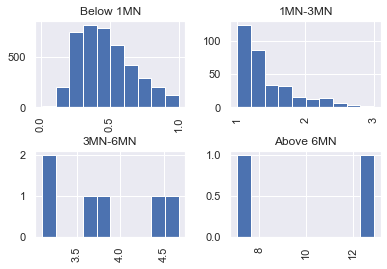

In [13]:
sns.set() #rescue matplotlib's styles from the early '90s

data.hist(by='price_group',column = 'price')
plt.show()

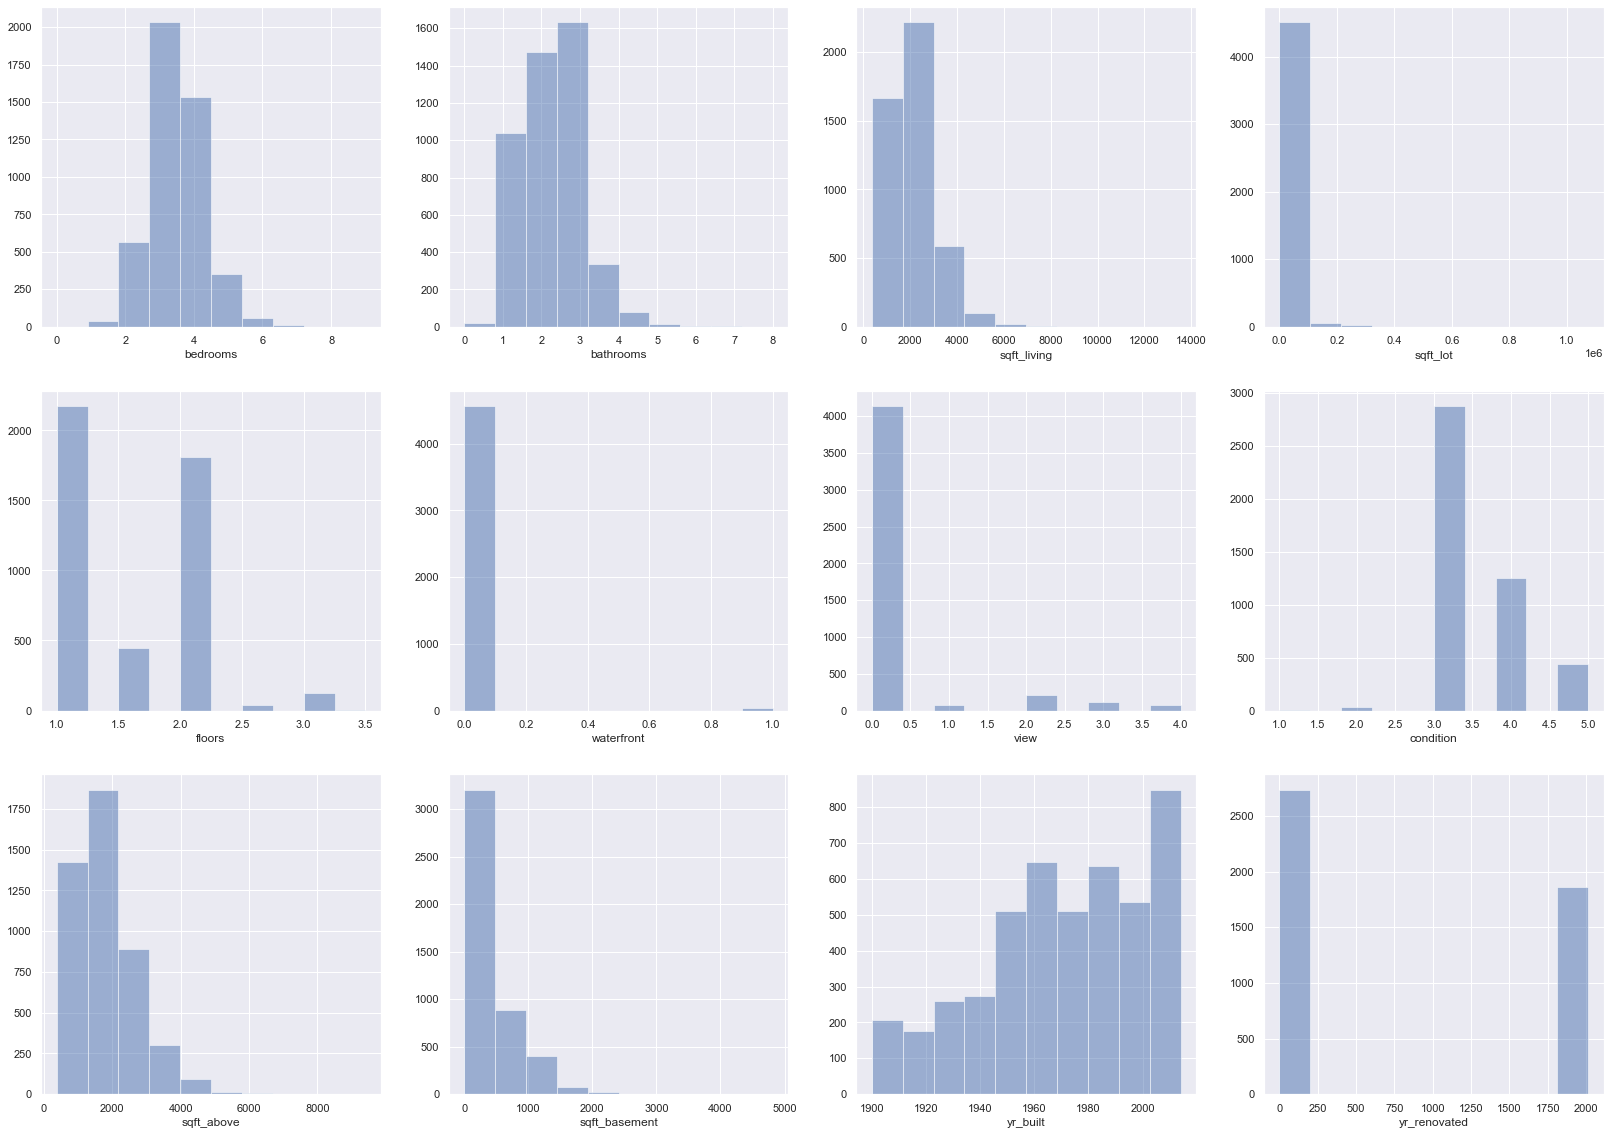

In [14]:
plt.figure(figsize=(28,20))
ax1 = plt.subplot2grid((3,4), (0,0))
x1 = data.bedrooms
res = plt.hist(x1,alpha = .5)
label=plt.xlabel("bedrooms")

ax2 = plt.subplot2grid((3,4), (0,1))
x2 = data.bathrooms
res = plt.hist(x2,alpha = .5)
label=plt.xlabel("bathrooms")

ax3 = plt.subplot2grid((3,4), (0, 2))
x3 = data.sqft_living
res = plt.hist(x3,alpha = .5)
label=plt.xlabel("sqft_living")

ax4 = plt.subplot2grid((3,4), (0, 3))
x4 = data.sqft_lot
res = plt.hist(x4,alpha = .5)
label=plt.xlabel("sqft_lot")

ax5 = plt.subplot2grid((3,4), (1, 0))
x5 = data.floors
res = plt.hist(x5,alpha = .5)
label=plt.xlabel("floors")

ax6 = plt.subplot2grid((3,4), (1,1))
x6 = data.waterfront
res = plt.hist(x6,alpha = .5)
label=plt.xlabel("waterfront")

ax7 = plt.subplot2grid((3,4), (1,2))
x7 = data.view
res = plt.hist(x7,alpha = .5)
label=plt.xlabel("view")

ax8 = plt.subplot2grid((3,4), (1, 3))
x8 = data.condition
res = plt.hist(x8,alpha = .5)
label=plt.xlabel("condition")

ax9 = plt.subplot2grid((3,4), (2, 0))
x9 = data.sqft_above
res = plt.hist(x9,alpha = .5)
label=plt.xlabel("sqft_above")

ax10 = plt.subplot2grid((3,4), (2, 1))
x10 = data.sqft_basement
res = plt.hist(x10,alpha = .5)
label=plt.xlabel("sqft_basement")

ax11 = plt.subplot2grid((3,4), (2,2))
x11 = data.yr_built
res = plt.hist(x11,alpha = .5)
label=plt.xlabel("yr_built")

ax12 = plt.subplot2grid((3,4), (2,3))
x12 = data.yr_renovated
res = plt.hist(x12,alpha = .5)
label=plt.xlabel("yr_renovated")

plt.show()

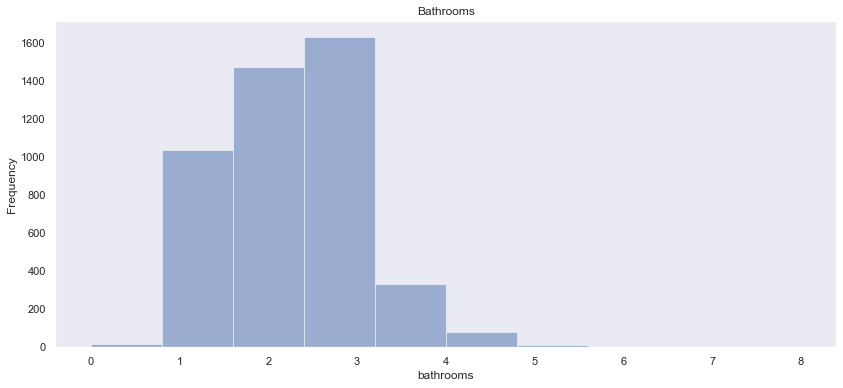

In [15]:
plt.figure(figsize = (14, 6))
plt.hist(data["bathrooms"], alpha = .5)
plt.title("Bathrooms")
plt.ylabel("Frequency")
plt.xlabel("bathrooms")
plt.grid()

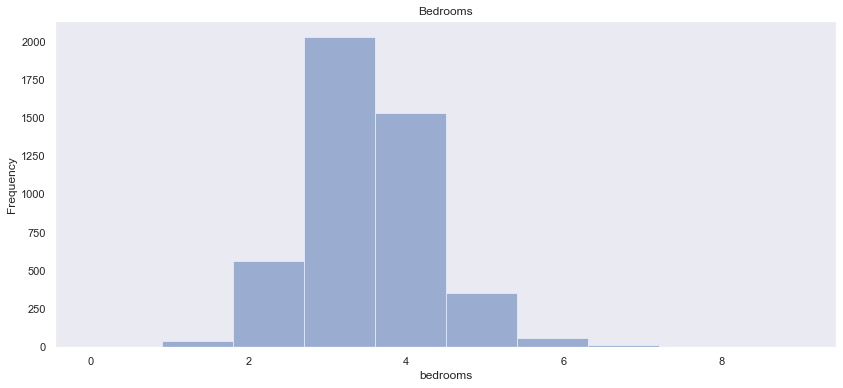

In [16]:
plt.figure(figsize = (14, 6))
plt.hist(data["bedrooms"], alpha = .5)
plt.title("Bedrooms")
plt.ylabel("Frequency")
plt.xlabel("bedrooms")
plt.grid()

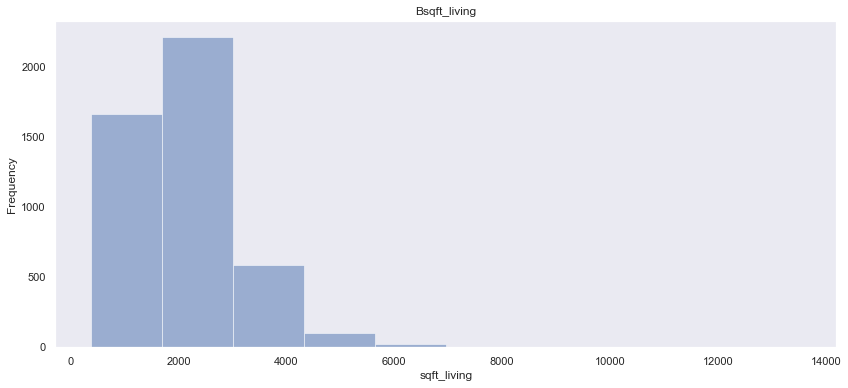

In [17]:
plt.figure(figsize = (14, 6))
plt.hist(data["sqft_living"], alpha = .5)
plt.title("Bsqft_living")
plt.ylabel("Frequency")
plt.xlabel("sqft_living")
plt.grid()

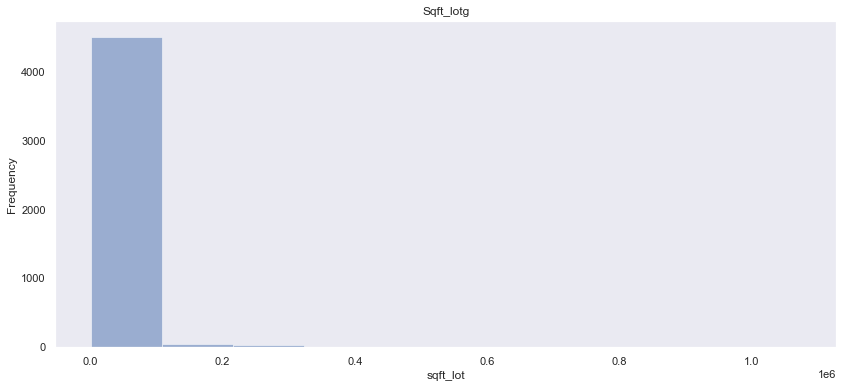

In [18]:
plt.figure(figsize = (14, 6))
plt.hist(data["sqft_lot"], alpha = .5)
plt.title("Sqft_lotg")
plt.ylabel("Frequency")
plt.xlabel("sqft_lot")
plt.grid()

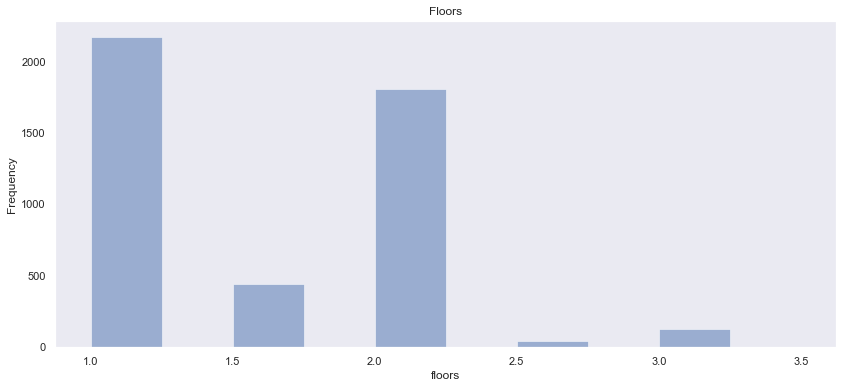

In [19]:
plt.figure(figsize = (14, 6))
plt.hist(data["floors"], alpha = .5)
plt.title("Floors")
plt.ylabel("Frequency")
plt.xlabel("floors")
plt.grid()

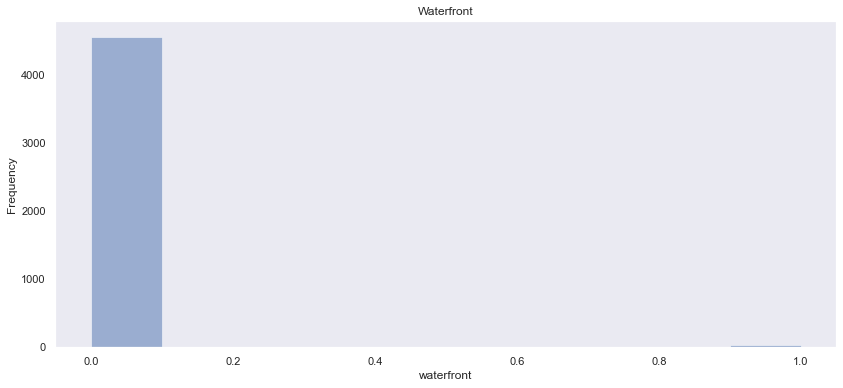

In [20]:
plt.figure(figsize = (14, 6))
plt.hist(data["waterfront"], alpha = .5)
plt.title("Waterfront")
plt.ylabel("Frequency")
plt.xlabel("waterfront")
plt.grid()

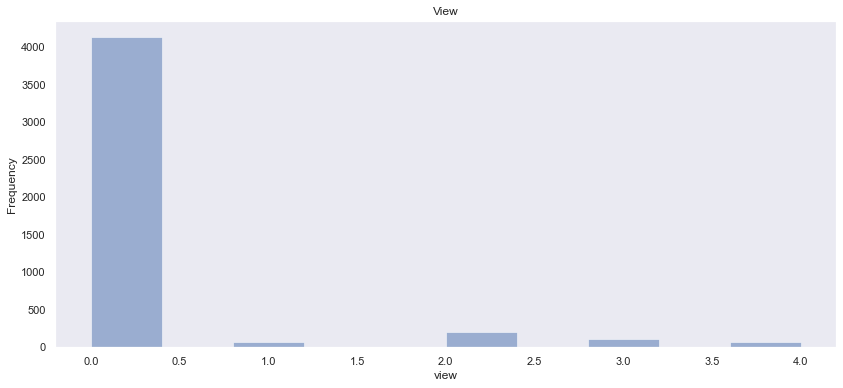

In [21]:
plt.figure(figsize = (14, 6))
plt.hist(data["view"], alpha = .5)
plt.title("View")
plt.ylabel("Frequency")
plt.xlabel("view")
plt.grid()

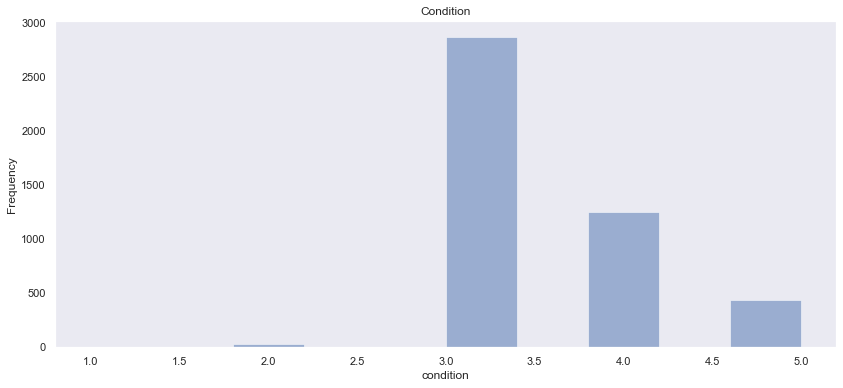

In [22]:
plt.figure(figsize = (14, 6))
plt.hist(data["condition"], alpha = .5)
plt.title("Condition")
plt.ylabel("Frequency")
plt.xlabel("condition")
plt.grid()

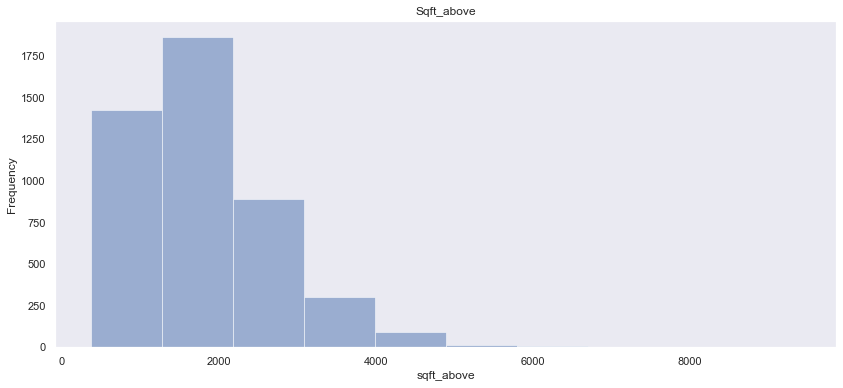

In [23]:
plt.figure(figsize = (14, 6))
plt.hist(data["sqft_above"], alpha = .5)
plt.title("Sqft_above")
plt.ylabel("Frequency")
plt.xlabel("sqft_above")
plt.grid()

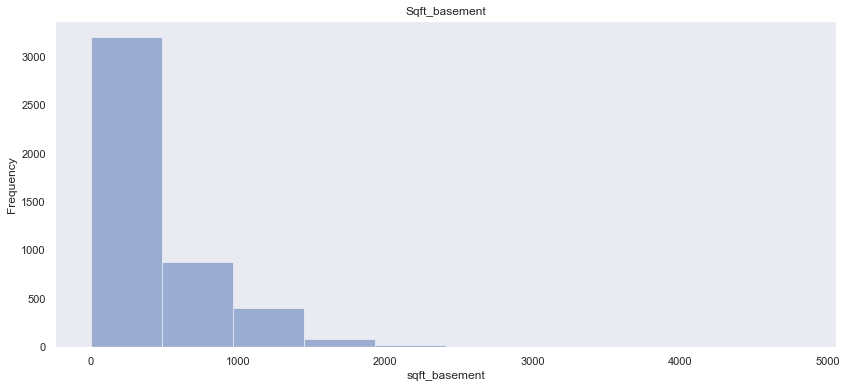

In [24]:
plt.figure(figsize = (14, 6))
plt.hist(data["sqft_basement"], alpha = .5)
plt.title("Sqft_basement")
plt.ylabel("Frequency")
plt.xlabel("sqft_basement")
plt.grid()

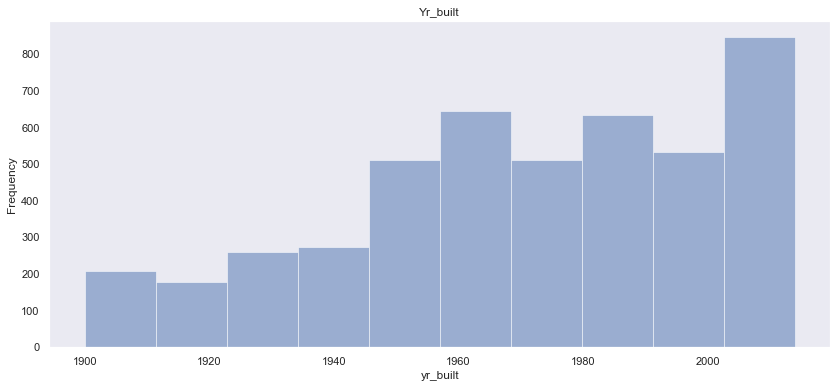

In [25]:
plt.figure(figsize = (14, 6))
plt.hist(data["yr_built"], alpha = .5)
plt.title("Yr_built")
plt.ylabel("Frequency")
plt.xlabel("yr_built")
plt.grid()

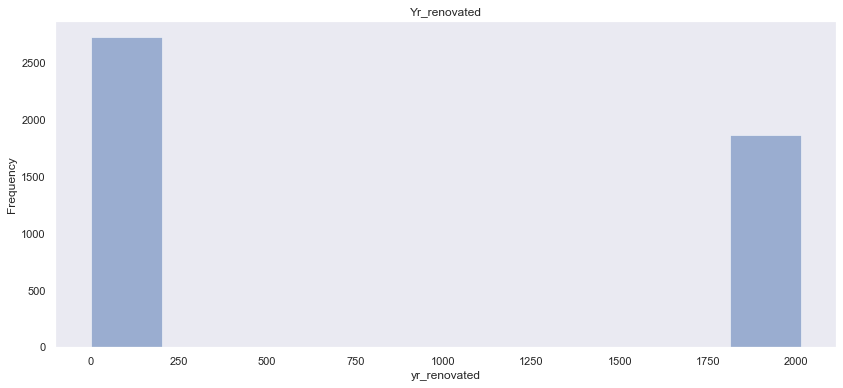

In [26]:
plt.figure(figsize = (14, 6))
plt.hist(data["yr_renovated"], alpha = .5)
plt.title("Yr_renovated")
plt.ylabel("Frequency")
plt.xlabel("yr_renovated")
plt.grid()

### Quantile Plots

In [27]:
import numpy as np 
import scipy.stats as stats

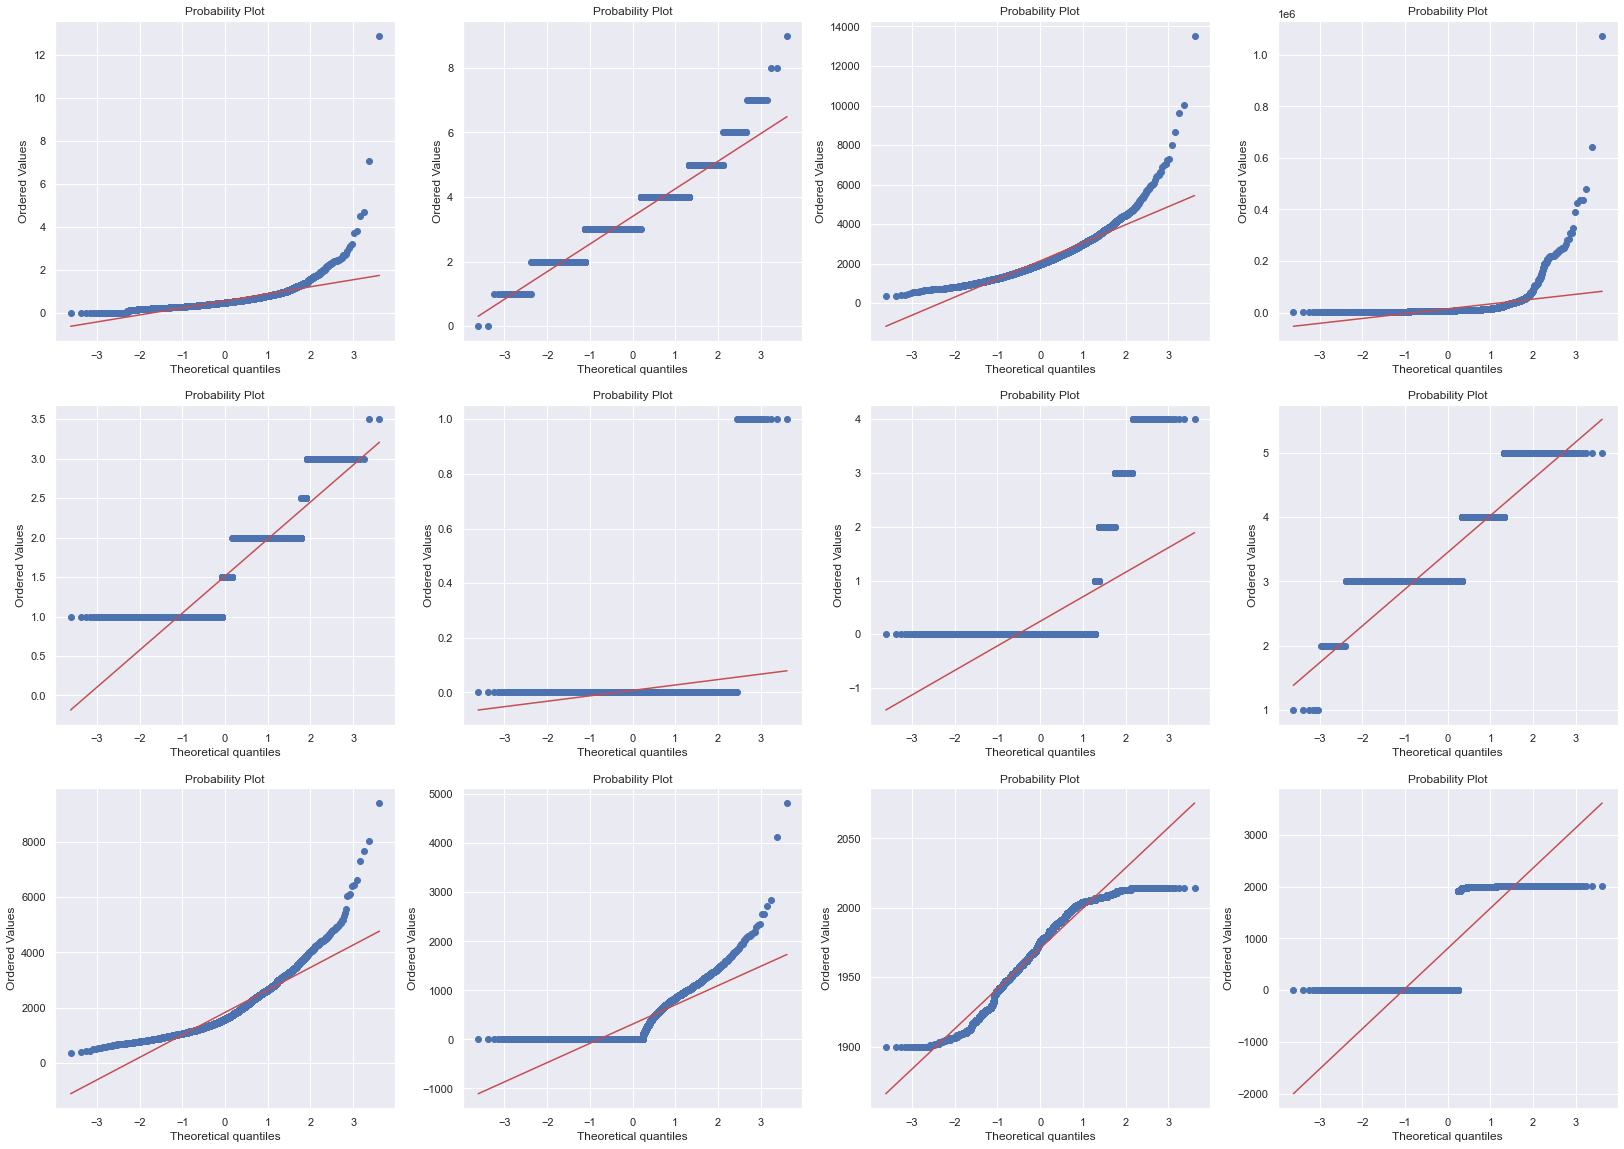

In [28]:
plt.figure(figsize=(28,20))
ax1 = plt.subplot2grid((3,4), (0,0))
x1 = data.price
res = stats.probplot(x1,dist="norm", plot=plt)

ax2 = plt.subplot2grid((3,4), (0,1))
x2 = data.bedrooms
res = stats.probplot(x2,dist="norm", plot=plt)

ax3 = plt.subplot2grid((3,4), (0, 2))
x3 = data.sqft_living
res = stats.probplot(x3,dist="norm", plot=plt)

ax4 = plt.subplot2grid((3,4), (0, 3))
x4 = data.sqft_lot
res = stats.probplot(x4,dist="norm", plot=plt)

ax5 = plt.subplot2grid((3,4), (1, 0))
x5 = data.floors
res = stats.probplot(x5,dist="norm", plot=plt)

ax6 = plt.subplot2grid((3,4), (1,1))
x6 = data.waterfront
res = stats.probplot(x6,dist="norm", plot=plt)

ax7 = plt.subplot2grid((3,4), (1,2))
x7 = data.view
res = stats.probplot(x7,dist="norm", plot=plt)

ax8 = plt.subplot2grid((3,4), (1, 3))
x8 = data.condition
res = stats.probplot(x8,dist="norm", plot=plt)

ax9 = plt.subplot2grid((3,4), (2, 0))
x9 = data.sqft_above
res = stats.probplot(x9,dist="norm", plot=plt)

ax10 = plt.subplot2grid((3,4), (2, 1))
x10 = data.sqft_basement
res = stats.probplot(x10,dist="norm", plot=plt)

ax11 = plt.subplot2grid((3,4), (2,2))
x11 = data.yr_built
res = stats.probplot(x11,dist="norm", plot=plt)

ax12 = plt.subplot2grid((3,4), (2,3))
x12 = data.yr_renovated
res = stats.probplot(x12,dist="norm", plot=plt)


plt.show()


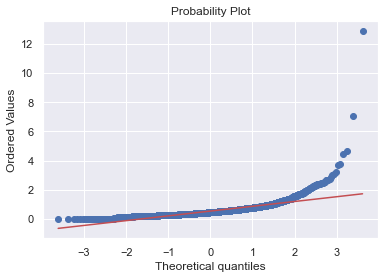

In [29]:
stats.probplot(data.price, dist="norm", plot=plt)
plt.show()

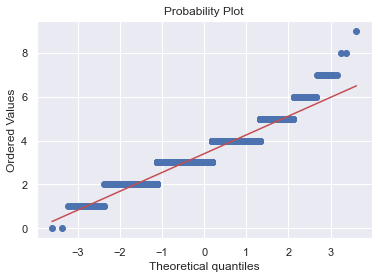

In [30]:
stats.probplot(data.bedrooms, dist="norm", plot=plt)
plt.show()

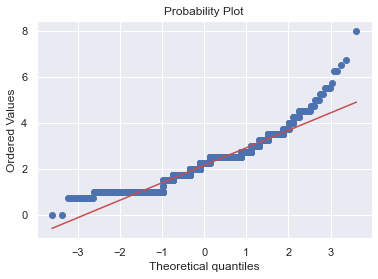

In [31]:
stats.probplot(data.bathrooms, dist="norm", plot=plt)
plt.show()

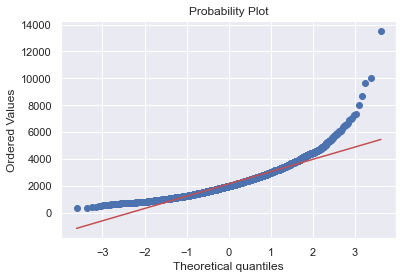

In [32]:
stats.probplot(data.sqft_living, dist="norm", plot=plt)
plt.show()

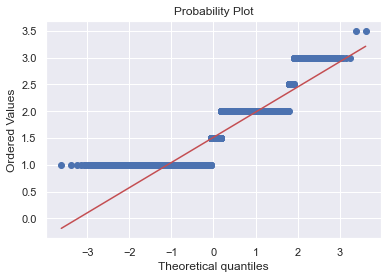

In [33]:
stats.probplot(data.floors, dist="norm", plot=plt)
plt.show()

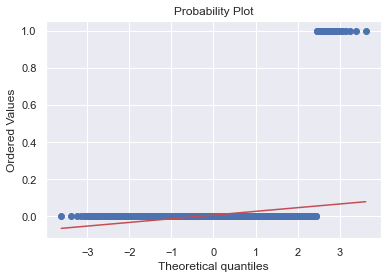

In [34]:
stats.probplot(data.waterfront, dist="norm", plot=plt)
plt.show()

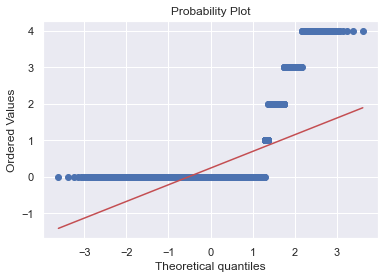

In [35]:
stats.probplot(data.view, dist="norm", plot=plt)
plt.show()

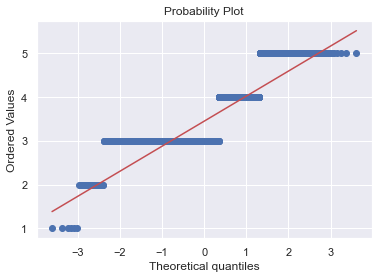

In [36]:
stats.probplot(data.condition, dist="norm", plot=plt)
plt.show()

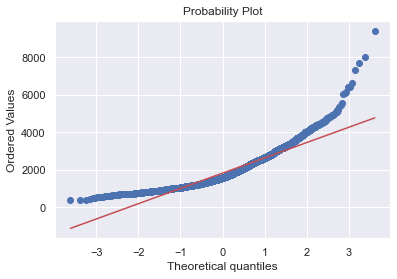

In [37]:
stats.probplot(data.sqft_above, dist="norm", plot=plt)
plt.show()

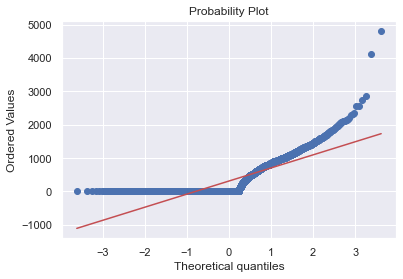

In [38]:
stats.probplot(data.sqft_basement, dist="norm", plot=plt)
plt.show()

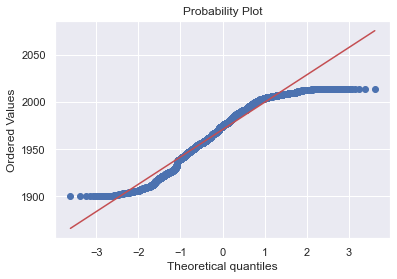

In [39]:
stats.probplot(data.yr_built, dist="norm", plot=plt)
plt.show()

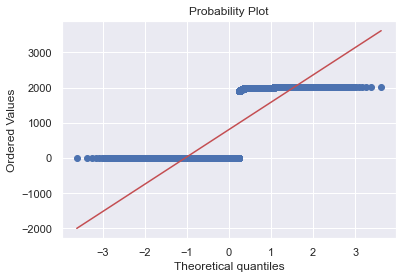

In [40]:
stats.probplot(data.yr_renovated, dist="norm", plot=plt)
plt.show()

### Correlation Plot

In [41]:
import seaborn as sns

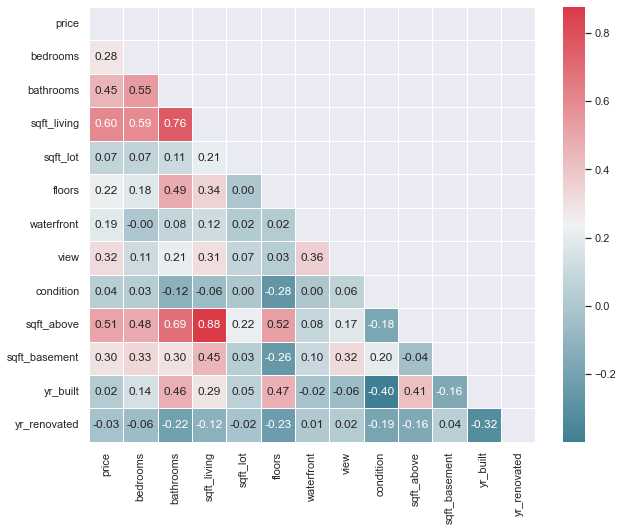

In [42]:
sub_data =  data[["price", "bedrooms", "bathrooms", "sqft_living","sqft_lot","floors","waterfront","view","condition","sqft_above","sqft_basement","yr_built","yr_renovated"]]
corr = sub_data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

### (b)
### Density Plot

Text(0.5, 0, 'yr_renovated')

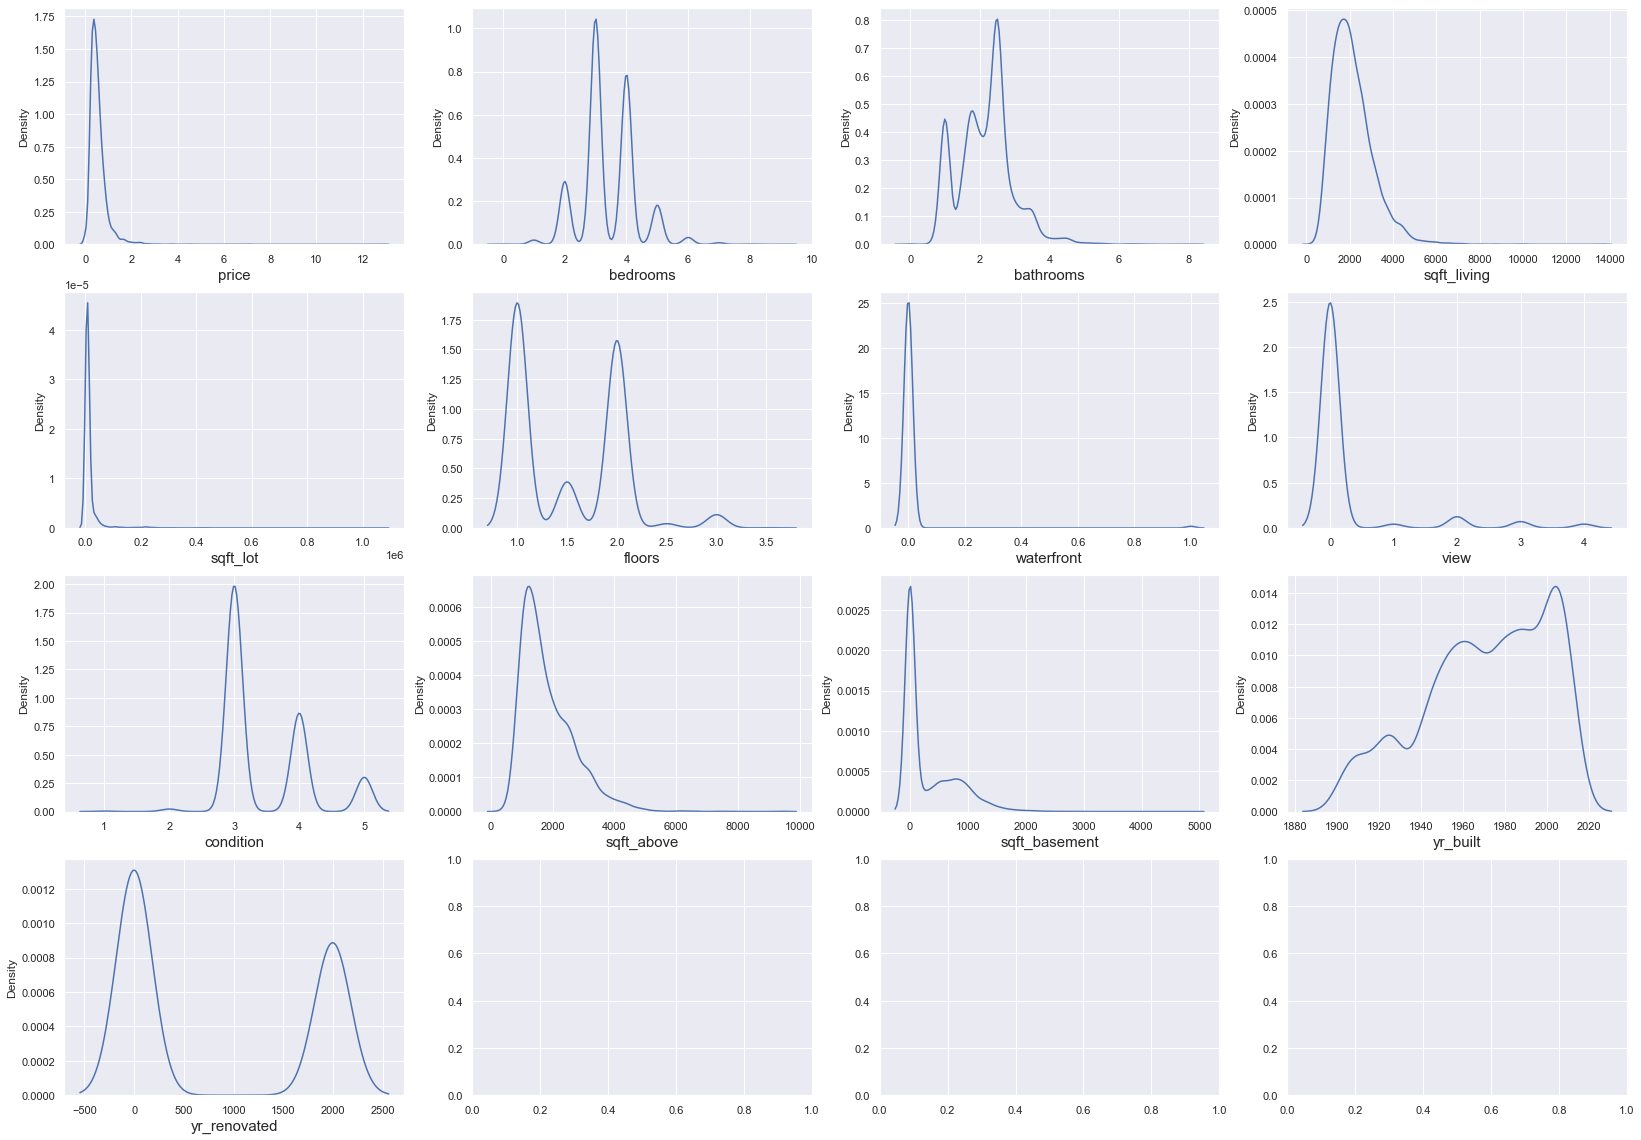

In [43]:

fig, axes = plt.subplots(4, 4, figsize=(28, 20))

# from matplotlib.colors import ListedColormap
# my_cmap = ListedColormap(sns.color_palette("Set2").as_hex())

sns.kdeplot(ax=axes[0,0], data=data, x='price')
axes[0,0].set_xlabel('price',fontsize=15)
sns.kdeplot(ax=axes[0, 1], data=data, x='bedrooms')
axes[0,1].set_xlabel('bedrooms',fontsize=15)
sns.kdeplot(ax=axes[0, 2],data=data,x='bathrooms')
axes[0,2].set_xlabel('bathrooms',fontsize=15)
sns.kdeplot(ax=axes[0, 3],data=data,x='sqft_living')
axes[0,3].set_xlabel('sqft_living',fontsize=15)
sns.kdeplot(ax=axes[1, 0],data=data,x='sqft_lot')
axes[1,0].set_xlabel('sqft_lot',fontsize=15)
sns.kdeplot(ax=axes[1, 1],data=data,x='floors')
axes[1,1].set_xlabel('floors',fontsize=15)
sns.kdeplot(ax=axes[1, 2],data=data,x='waterfront')
axes[1,2].set_xlabel('waterfront',fontsize=15)
sns.kdeplot(ax=axes[1, 3],data=data, x='view')
axes[1,3].set_xlabel('view',fontsize=15)
sns.kdeplot(ax=axes[2, 0],data=data, x='condition')
axes[2,0].set_xlabel('condition',fontsize=15)
sns.kdeplot(ax=axes[2, 1],data=data, x='sqft_above')
axes[2,1].set_xlabel('sqft_above',fontsize=15)
sns.kdeplot(ax=axes[2, 2],data=data, x='sqft_basement')
axes[2,2].set_xlabel('sqft_basement',fontsize=15)
sns.kdeplot(ax=axes[2, 3],data=data, x='yr_built')
axes[2,3].set_xlabel('yr_built',fontsize=15)
sns.kdeplot(ax=axes[3, 0],data=data, x='yr_renovated')
axes[3,0].set_xlabel('yr_renovated',fontsize=15)

<AxesSubplot:xlabel='price', ylabel='Density'>

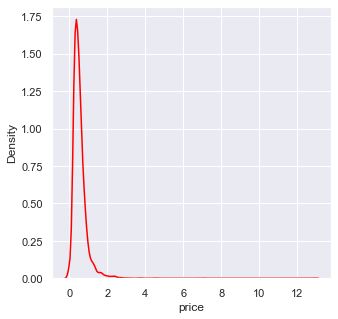

In [44]:
plt.figure(figsize=(5,5))
sns.kdeplot(data.price, color = "red")


<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

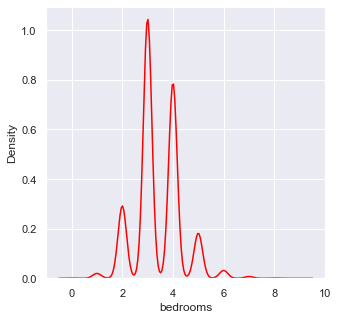

In [45]:
plt.figure(figsize=(5,5))
sns.kdeplot(data.bedrooms, color = "red")


<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

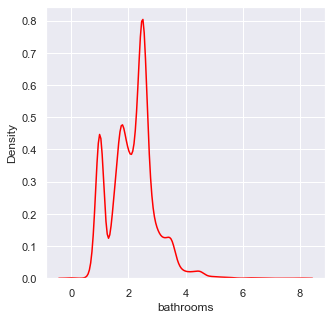

In [46]:
plt.figure(figsize=(5,5))
sns.kdeplot(data.bathrooms, color = "red")


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

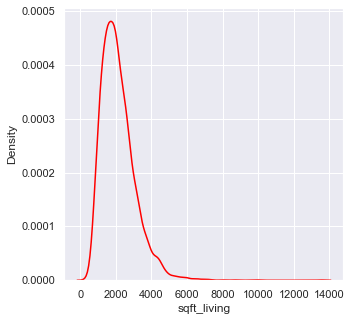

In [47]:
plt.figure(figsize=(5,5))
sns.kdeplot(data.sqft_living, color = "red")


<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

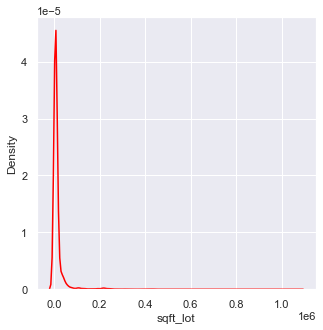

In [48]:
plt.figure(figsize=(5,5))
sns.kdeplot(data.sqft_lot, color = "red")


<AxesSubplot:xlabel='floors', ylabel='Density'>

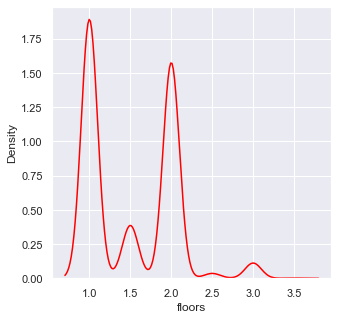

In [49]:
plt.figure(figsize=(5,5))
sns.kdeplot(data.floors, color = "red")


<AxesSubplot:xlabel='waterfront', ylabel='Density'>

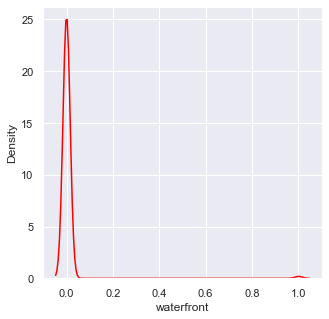

In [50]:
plt.figure(figsize=(5,5))
sns.kdeplot(data.waterfront, color = "red")


<AxesSubplot:xlabel='view', ylabel='Density'>

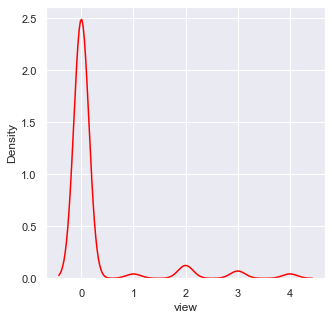

In [51]:
plt.figure(figsize=(5,5))
sns.kdeplot(data.view, color = "red")


<AxesSubplot:xlabel='condition', ylabel='Density'>

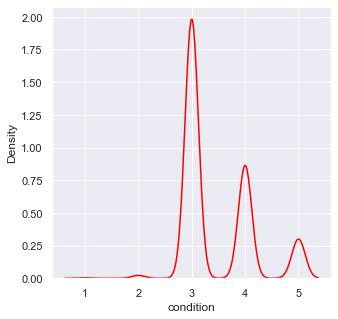

In [52]:
plt.figure(figsize=(5,5))
sns.kdeplot(data.condition, color = "red")


<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

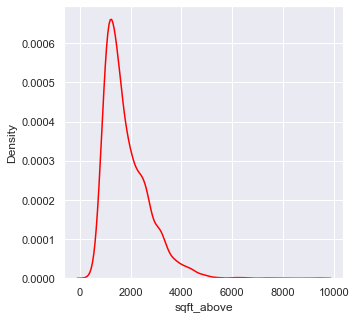

In [53]:
plt.figure(figsize=(5,5))
sns.kdeplot(data.sqft_above, color = "red")


<AxesSubplot:xlabel='sqft_basement', ylabel='Density'>

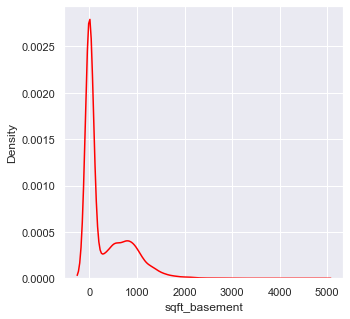

In [54]:
plt.figure(figsize=(5,5))
sns.kdeplot(data.sqft_basement, color = "red")


<AxesSubplot:xlabel='yr_built', ylabel='Density'>

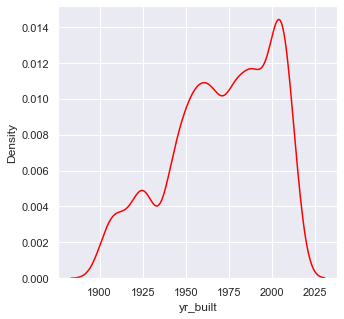

In [55]:
plt.figure(figsize=(5,5))
sns.kdeplot(data.yr_built, color = "red")


<AxesSubplot:xlabel='yr_renovated', ylabel='Density'>

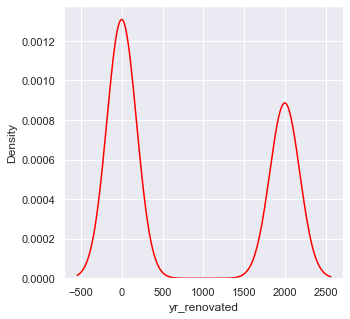

In [56]:
plt.figure(figsize=(5,5))
sns.kdeplot(data.yr_renovated, color = "red")

### (c) Any non-linearities within variables.
Price, floors, condition and bedrooms are linear, since most of the points are on the fitted line.
Bathrooms, sqft_living, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated are not linear. 
We should use log transformation to make them linear. We pick out bathrooms and sqft_livingas log variables to compute.
If the non-linear variables are included in the regression, the data will be unorganized. Chaotic data may result in difficulties of creating model. Thus, the result might contain bias, and the created model may not correctly predict the result. Besides, it is hard to find features within each variable. Transformation can also reduce the influence of outliers, and convert the raw data into a ready-to-use format.

 ### (d) Any outliers and/or unusual features ofvariables.

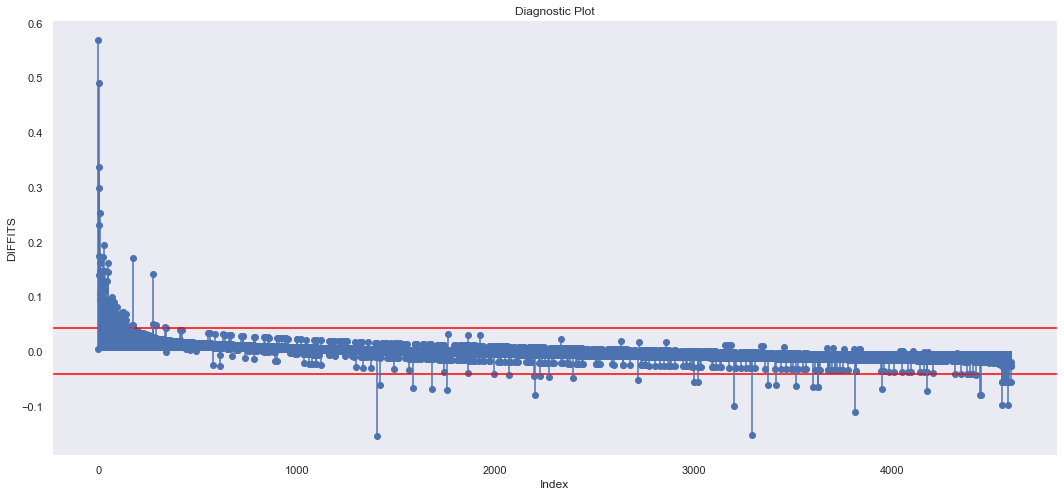

In [57]:
reg_1 = smf.ols('price ~ bedrooms', data = data).fit()
dffits, threshold = reg_1.get_influence().dffits
plt.figure(figsize = (18, 8))
plt.scatter(data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()

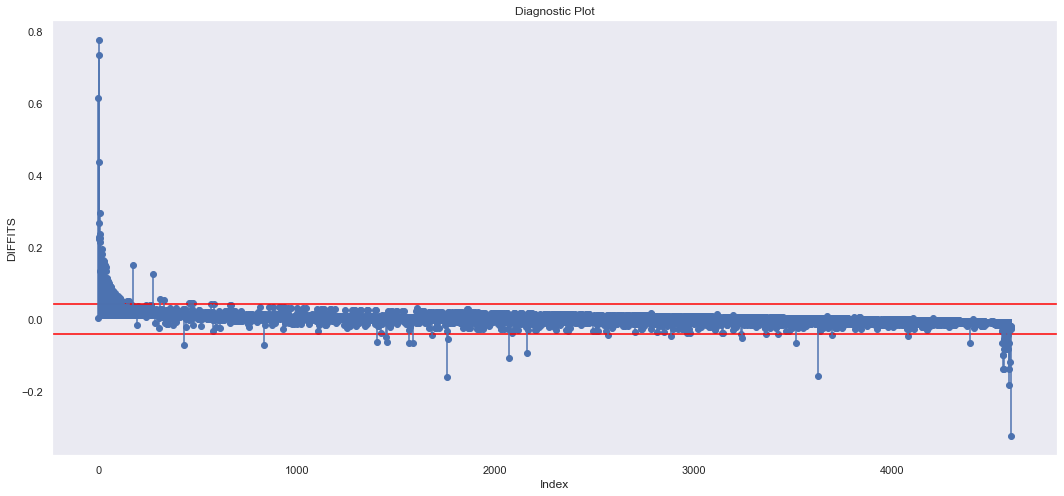

In [58]:
reg_2 = smf.ols('price ~ bathrooms', data = data).fit()
dffits, threshold = reg_2.get_influence().dffits
plt.figure(figsize = (18, 8))
plt.scatter(data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()


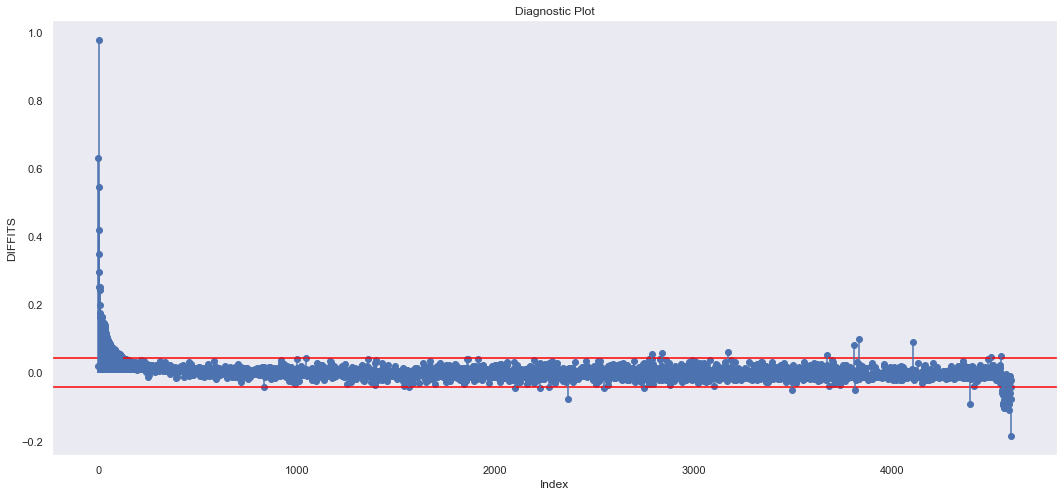

In [59]:

reg_3 = smf.ols('price ~ np.log(sqft_living)', data = data).fit()
dffits, threshold = reg_3.get_influence().dffits
plt.figure(figsize = (18, 8))
plt.scatter(data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()



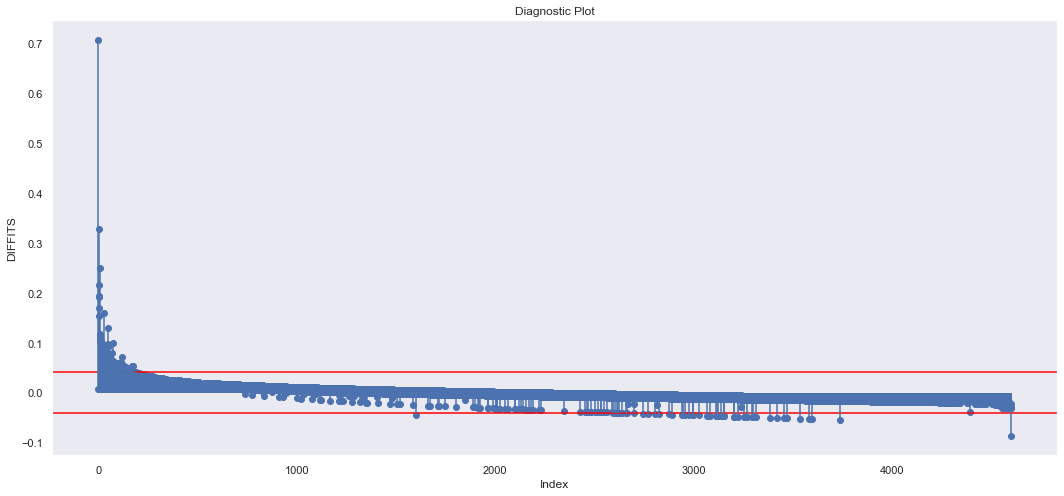

In [60]:
reg_4 = smf.ols('price ~ floors', data = data).fit()
dffits, threshold = reg_4.get_influence().dffits
plt.figure(figsize = (18, 8))
plt.scatter(data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()


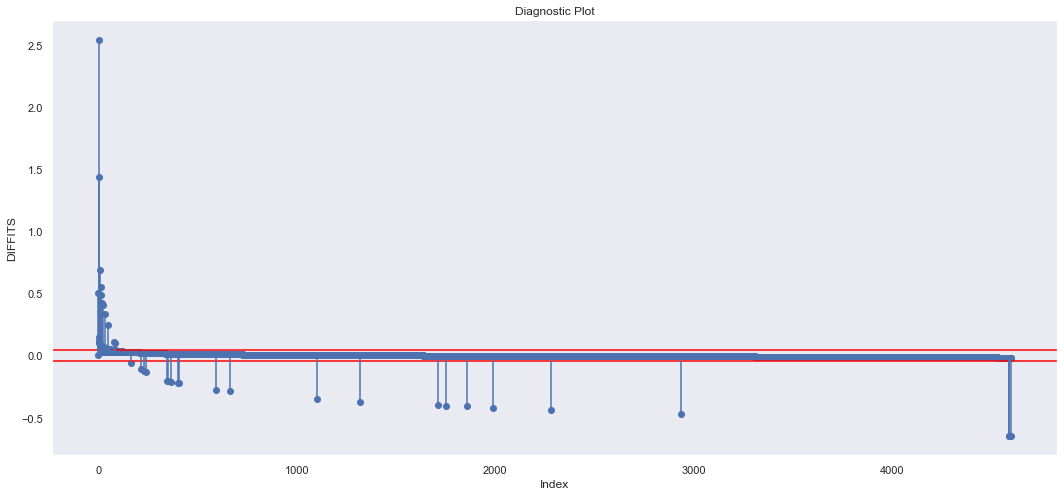

In [61]:
reg_5 = smf.ols('price ~ waterfront', data = data).fit()
dffits, threshold = reg_5.get_influence().dffits
plt.figure(figsize = (18, 8))
plt.scatter(data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()

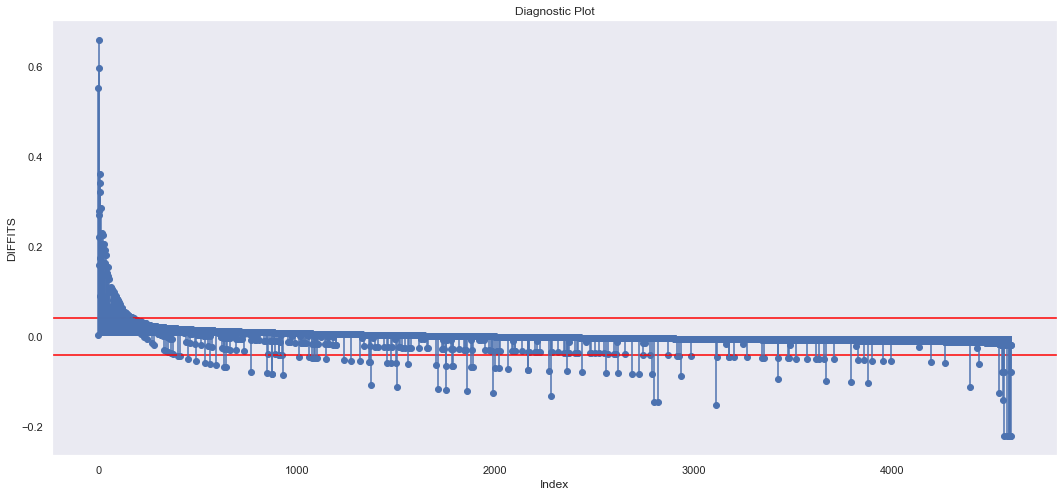

In [62]:
reg_6 = smf.ols('price ~ view', data = data).fit()
dffits, threshold = reg_6.get_influence().dffits
plt.figure(figsize = (18, 8))
plt.scatter(data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()

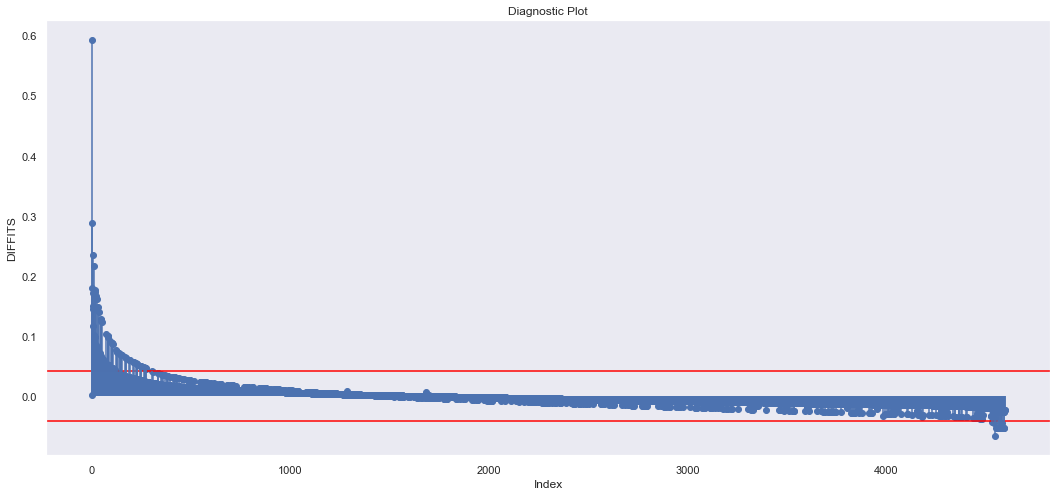

In [63]:
reg_7 = smf.ols('price ~ condition', data = data).fit()
dffits, threshold = reg_7.get_influence().dffits
plt.figure(figsize = (18, 8))
plt.scatter(data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()

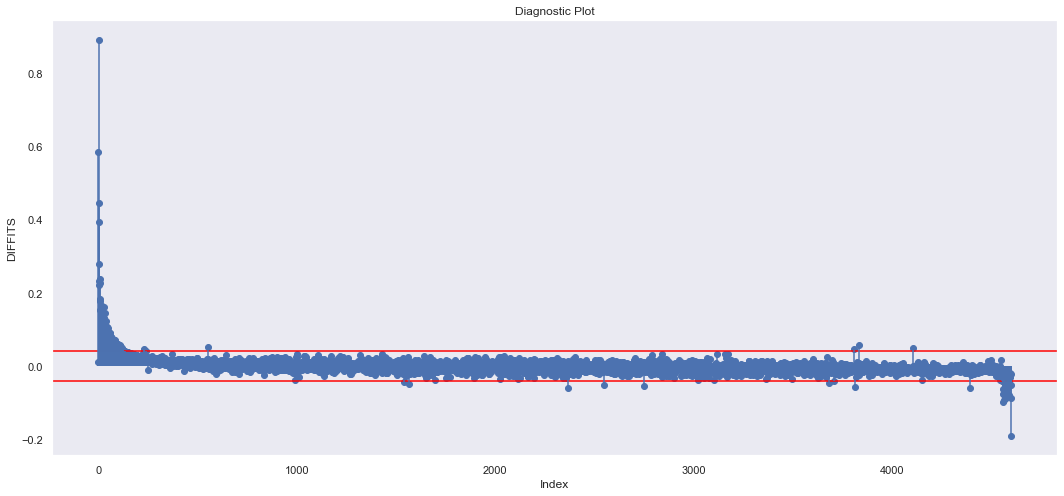

In [64]:
reg_8 = smf.ols('price ~ np.log(sqft_above)', data = data).fit()
dffits, threshold = reg_8.get_influence().dffits
plt.figure(figsize = (18, 8))
plt.scatter(data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()

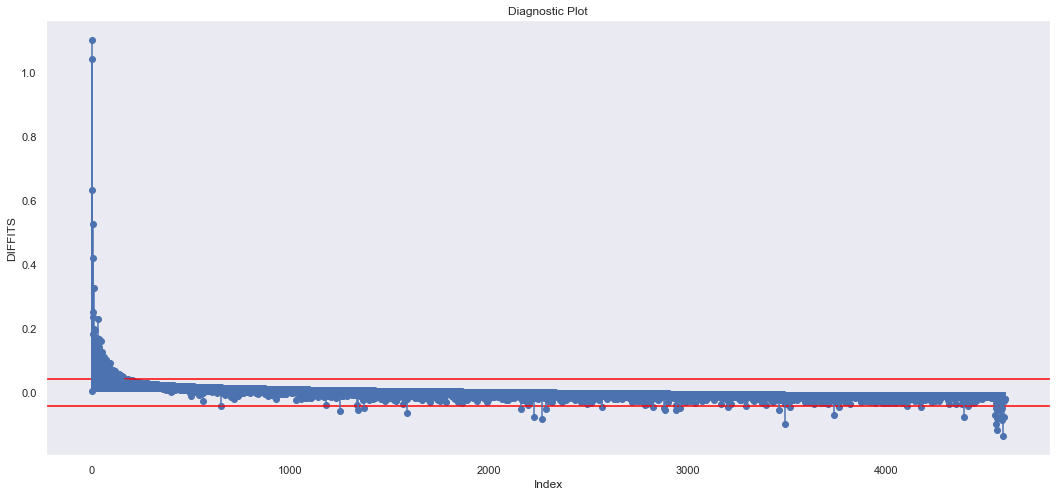

In [65]:
reg_9 = smf.ols('price ~ sqft_basement', data = data).fit()
dffits, threshold = reg_9.get_influence().dffits
plt.figure(figsize = (18, 8))
plt.scatter(data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()

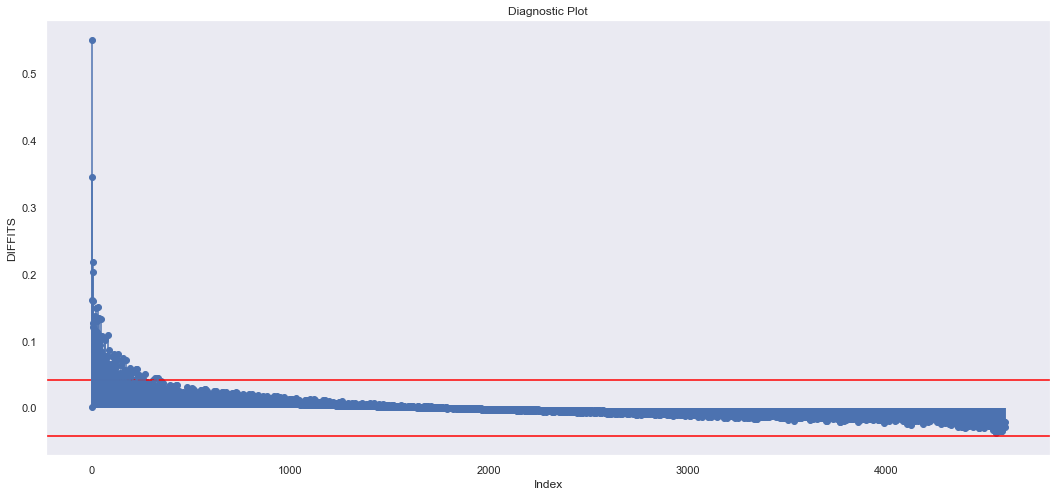

In [66]:
reg_10 = smf.ols('price ~ yr_built', data = data).fit()
dffits, threshold = reg_10.get_influence().dffits
plt.figure(figsize = (18, 8))
plt.scatter(data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()

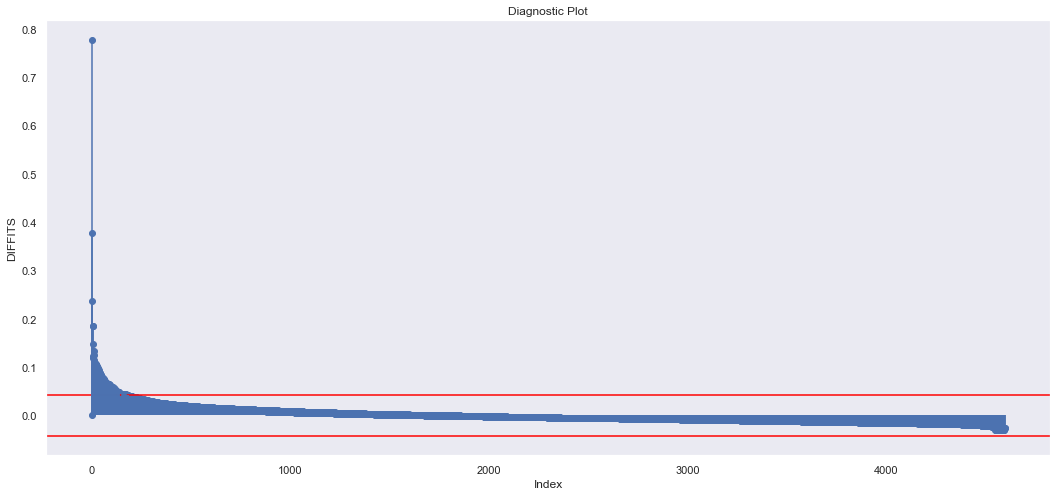

In [67]:
reg_11 = smf.ols('price ~ yr_renovated', data = data).fit()
dffits, threshold = reg_11.get_influence().dffits
plt.figure(figsize = (18, 8))
plt.scatter(data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()

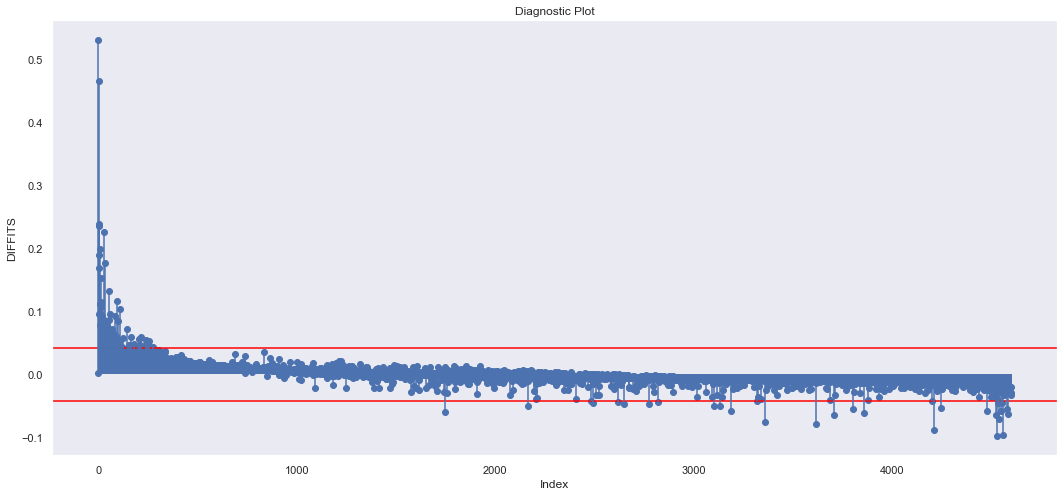

In [68]:
reg_12 = smf.ols('price ~ np.log(sqft_lot)', data = data).fit()
dffits, threshold = reg_12.get_influence().dffits
plt.figure(figsize = (18, 8))
plt.scatter(data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()

 price is a little right skewed, there are outliers on the side of higher theoretical quantilesw.
 bedrooms, condition and floors is a discrete data variable, but still linear. It can be use with carefulness.
 bathrooms is right skewed, there are mild outliers on both sides.
 sqft_living is right skewed, there are mild outliers on both sides.
 waterfront is binary variable, majorities are 0(no).
 view is a discrete variable, majorities are 0, so the fitted line can not correctly describe the data.
 sqft_above is right skewed, there are mild outliers on the left side, and  outliers on the side of higher theoretical quantiles.
 sqft_basement is right skewed, there are too many 0s, and there are two outliers on the side of higher theoretical quantiles
 yr_built is light tailed.
 yr_renovated is either around 2000 or 0.
 
 ### (e) Any NAs?
 no NAs.

In [69]:
# !pip install BorutaShap

In [70]:
# from BorutaShap import BorutaShap
# import pandas as pd 
# import numpy as np 
# from sklearn.ensemble import RandomForestRegressor

In [71]:
# pip install ipywidgets

In [72]:
# x = data.iloc[:, 2:]
# y = data['price']

In [73]:
# 10 minutes to run for n_trial=50 
# if model is not specified in BroutaShap(): default = random forest (just like R and BorutaPy)
# Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
# Feature_Selector.fit(X=x, y=y, n_trials=50, random_state=0)
# Feature_Selector.plot(which_features='all')

### Question 2 Variable Selection
### (a) The Boruta Algorithm identify the top 2 predictors

In [74]:
%%R
#install.packages("Boruta")
dataf<-read.csv('/Users/hongtingfei/Desktop/MQE/2022-2023Fall/Econ430/HousePrice.csv')
library(Boruta)
boruta.reg <- Boruta(price ~., data = dataf, doTrace = 2)

R[write to console]:  1. run of importance source...

R[write to console]:  2. run of importance source...

R[write to console]:  3. run of importance source...

R[write to console]:  4. run of importance source...

R[write to console]:  5. run of importance source...

R[write to console]:  6. run of importance source...

R[write to console]:  7. run of importance source...

R[write to console]:  8. run of importance source...

R[write to console]:  9. run of importance source...

R[write to console]:  10. run of importance source...

R[write to console]:  11. run of importance source...

R[write to console]: After 11 iterations, +13 secs: 

R[write to console]:  confirmed 9 attributes: bathrooms, bedrooms, condition, floors, sqft_above and 4 more;

R[write to console]:  rejected 2 attributes: DATE, waterfront;

R[write to console]:  still have 2 attributes left.


R[write to console]:  12. run of importance source...

R[write to console]:  13. run of importance source...

R[write to c

Boruta performed 49 iterations in 54.49944 secs.
 10 attributes confirmed important: bathrooms, bedrooms, condition,
floors, sqft_above and 5 more;
 3 attributes confirmed unimportant: DATE, waterfront, yr_renovated;


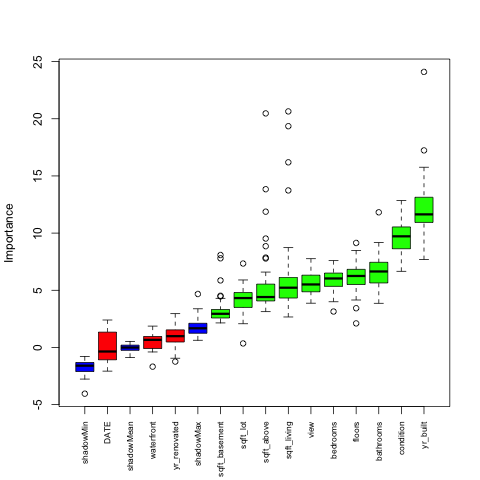

In [75]:
%%R

boruta.reg_result <- TentativeRoughFix(boruta.reg)
print(boruta.reg_result)

plot(boruta.reg_result, xlab = "", xaxt = "n")
lz<-lapply(1:ncol(boruta.reg_result$ImpHistory),function(i)
  boruta.reg_result$ImpHistory[is.finite(boruta.reg_result$ImpHistory[,i]),i])
names(lz) <- colnames(boruta.reg_result$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),
     at = 1:ncol(boruta.reg_result$ImpHistory), cex.axis = 0.7)

Based on the Boruta Algorithm, the top 2 predictors are yr_built and condition.

### (b) Mallows Cp identify the top 2 predictors

R[write to console]: Loading required package: carData

R[write to console]: Loading required package: lmtest

R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: Loading required package: sandwich

R[write to console]: Loading required package: survival



Reordering variables and trying again:
              Abbreviation
bedrooms                bd
bathrooms               bt
sqft_living        sqft_lv
sqft_lot           sqft_lt
floors                   f
waterfront               w
view                     v
condition                c
sqft_above         sqft_bv
yr_built              yr_b
yr_renovated          yr_r
sqft_basement      sqft_bs


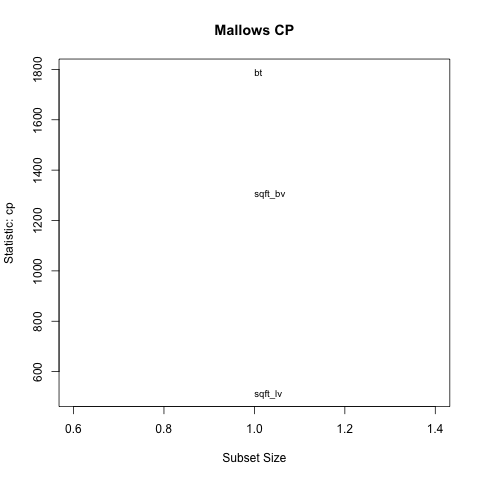

In [76]:
%%R
library(car)
library(AER)
library(broom)
library(leaps)
mreg.mod5 <- lm(price ~ bedrooms + bathrooms + sqft_living+sqft_lot+floors+waterfront+view+condition+sqft_above+sqft_basement+yr_built+yr_renovated, data=dataf)
ss=regsubsets(price ~ bedrooms + bathrooms + sqft_living+sqft_lot+floors+waterfront+view+condition+sqft_above+sqft_basement+yr_built+yr_renovated,method=c("exhaustive"),nbest=3,data=dataf)
#dev.new(width=28, height=20, unit="cm")
subsets(ss,statistic="cp",legend=F,main="Mallows CP",col="steelblue4",min.size=1,max.size=1,cex.subsets=0.8)

Based on the Mallows Cp, the top 2 predictors are sqft_living and sqft_bv.

### Question 3 Model Building

### Goodness of Fit

In [77]:
# Predictors from Q2 are sqft_living, sqft_bv, yr_built, condition.

# OLS model 1: price ~ sqft_living
# fit a regression
reg1 = smf.ols('price ~ sqft_living', data = data)
result1 = reg1.fit()

result1.rsquared

0.36171899204081126

In [78]:
# OLS model 2: price ~ sqft_bv
reg2 = smf.ols('price ~ sqft_above', data = data)
result2 = reg2.fit()
result2.rsquared

0.2624042194542484

In [79]:
# OLS model 3: price ~ yr.built
reg3 = smf.ols('price ~ yr_built', data = data)
result3 = reg3.fit()
result3.rsquared

0.0004031640572224049

In [80]:
# OLS model 4: price ~ condition
reg4 = smf.ols('price ~ condition', data = data)
result4 = reg4.fit()
result4.rsquared

0.001339259979414531

Because of the small R-squared values, we decided to transform the response variable 'price' by log( ).

And we prove the feasibilty by ploting the histogram.

### Transformations

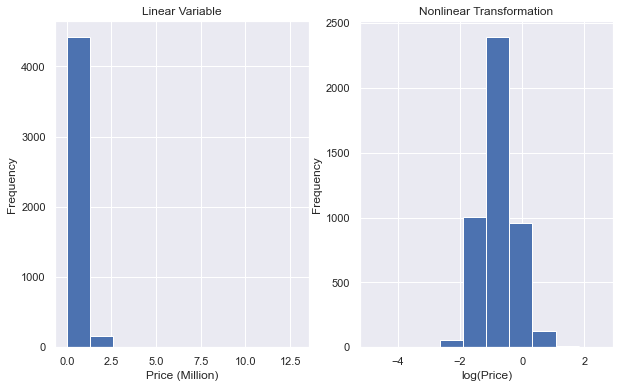

In [81]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[0].hist(data.price)
ax[0].set_title("Linear Variable")
ax[0].set_xlabel("Price (Million)")
ax[0].set_ylabel("Frequency")

data_p=data[data.price>0]
ax[1].hist(np.log(data_p.price))
ax[1].set_title("Nonlinear Transformation")
ax[1].set_xlabel("log(Price)")
ax[1].set_ylabel("Frequency")
plt.show()

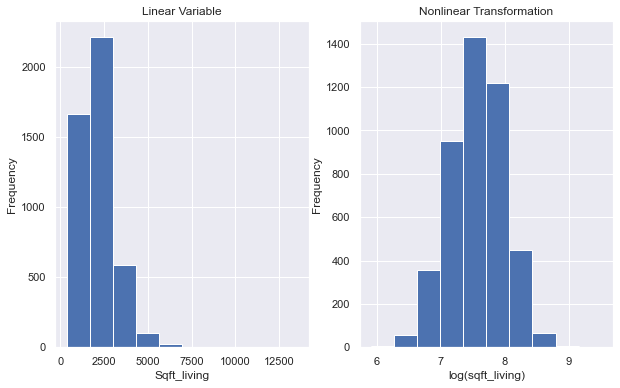

In [82]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[0].hist(data.sqft_living)
ax[0].set_title("Linear Variable")
ax[0].set_xlabel("Sqft_living")
ax[0].set_ylabel("Frequency")

data_p=data[data.price>0]
ax[1].hist(np.log(data_p.sqft_living))
ax[1].set_title("Nonlinear Transformation")
ax[1].set_xlabel("log(sqft_living)")
ax[1].set_ylabel("Frequency")
plt.show()

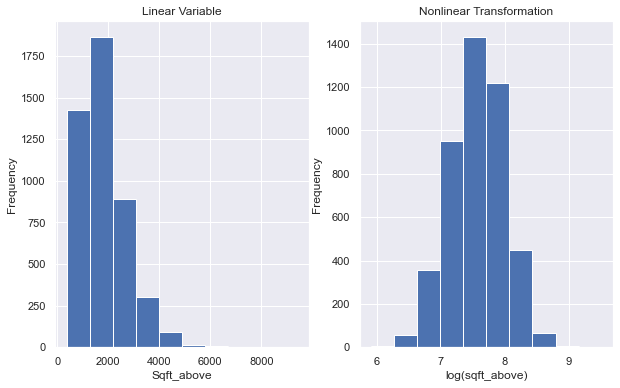

In [83]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[0].hist(data.sqft_above)
ax[0].set_title("Linear Variable")
ax[0].set_xlabel("Sqft_above")
ax[0].set_ylabel("Frequency")

data_p=data[data.price>0]
ax[1].hist(np.log(data_p.sqft_living))
ax[1].set_title("Nonlinear Transformation")
ax[1].set_xlabel("log(sqft_above)")
ax[1].set_ylabel("Frequency")
plt.show()

In [84]:
# 1. Transformation with sqft_living:
# np.log(price) ~ np.log(sqft_living)
# price ~ np.log(sqft_living)
# np.log(price) ~ sqft_living derives the largetst R-squared value of 0.458
trans1 = smf.ols('np.log(price) ~ sqft_living', data = data[data.price>0])
result_trans1 = trans1.fit()

result_trans1.summary()
#type(result_trans1.params)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     3848.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:47:48   Log-Likelihood:                -2253.8
No. Observations:                4551   AIC:                             4512.
Df Residuals:                    4549   BIC:                             4524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5660      0.014   -108.814      0.000      -1.594      -1.538
sqft_living     0.0004   6.16e-06     62.032      0.000       0.000       0.000
==============================================================================
Omnibus:                      384.329   Durbin-Watson:                   0.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1989.831
Skew:                          -0.225   Prob(JB):                         0.00
Kurtosis:                       6.208   Cond. No.                     5.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### A one unit increase in sqft_living is associated with a 0.04% increase in price. 

In [85]:
# Transformation with sqft_above: 
# np.log(price) ~ np.log(sqft_above)
# price ~ np.log(sqft_above)
# np.log(price) ~ sqft_above derives the largest R-squared value of 0.344
trans2 = smf.ols('np.log(price) ~ sqft_above', data = data[data.price>0])
result_trans2 = trans2.fit()

result_trans2.summary()
# result_trans2.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     2388.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:47:48   Log-Likelihood:                -2688.4
No. Observations:                4551   AIC:                             5381.
Df Residuals:                    4549   BIC:                             5394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4264      0.015    -93.495      0.000      -1.456      -1.397
sqft_above     0.0004   7.58e-06     48.868      0.000       0.000       0.000
==============================================================================
Omnibus:                      222.205   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.316
Skew:                           0.007   Prob(JB):                    2.46e-177
Kurtosis:                       5.071   Cond. No.                     4.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### A one unit increase in sqft_above is associated with a 0.04% increase in price. 

In [86]:
# Transformation with yr_built: np.log(price) ~ yr_built
trans3 = smf.ols('np.log(price) ~ yr_built', data = data[data.price>0])
result_trans3 = trans3.fit()

result_trans3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     15.54
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           8.18e-05
Time:                        21:47:48   Log-Likelihood:                -3640.8
No. Observations:                4551   AIC:                             7286.
Df Residuals:                    4549   BIC:                             7299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8363      0.529     -5.363      0.000      -3.873      -1.799
yr_built       0.0011      0.000      3.943      0.000       0.001       0.002
==============================================================================
Omnibus:                      207.437   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.834
Skew:                           0.273   Prob(JB):                    8.65e-106
Kurtosis:                       4.501   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
# Transformation with condition: np.log(price) ~ condition
trans4 = smf.ols('np.log(price) ~ np.log(condition)', data = data[data.price>0])
result_trans4 = trans4.fit()

result_trans4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     17.83
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           2.46e-05
Time:                        21:47:48   Log-Likelihood:                -3639.7
No. Observations:                4551   AIC:                             7283.
Df Residuals:                    4549   BIC:                             7296.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9720      0.053    -18.392      0.000      -1.076      -0.868
np.log(condition)     0.1808      0.043      4.223      0.000       0.097       0.265
==============================================================================
Omnibus:                      190.367   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.151
Skew:                           0.261   Prob(JB):                     4.78e-93
Kurtosis:                       4.404   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The R-squared values of the last two models are too small that we decided to continue with the first two models.

### Look at Cook’s distance Plot, Residuals Plot
#### Sqft_living

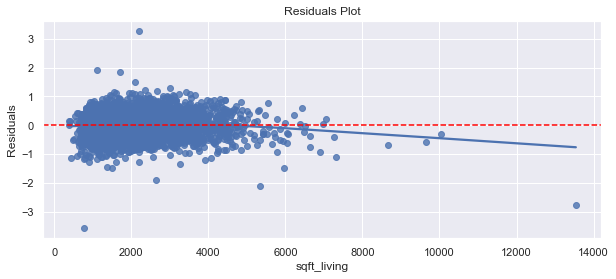

In [88]:
# Residuals Plot w/ sqft_living
plt.figure(figsize = (10,4))
sns.regplot(x=data[data.price>0].sqft_living, y=result_trans1.resid, lowess = True)
plt.axhline(0, linestyle ='--', color='red')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


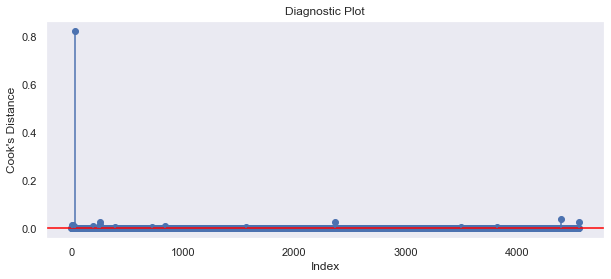

In [89]:
# Cook's distance
# Of model: trans1: np.log(price) ~ sqft_living
cooks_distance_1 = result_trans1.get_influence().cooks_distance
# print(cooks_distance_1)
# print(len(cooks_distance_1[0]))
plt.figure(figsize = (10,4))
plt.scatter(data[data.price>0].index, cooks_distance_1[0])
plt.axhline(0, color = 'red')
plt.vlines(x=data[data.price>0].index, ymin=0, ymax=cooks_distance_1[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic Plot')
plt.grid()

In [90]:
# for i,v in enumerate(cooks_distance_1[0]):
#     print(v)
a=len(cooks_distance_1[0])
drop_indices=[i for i,v in enumerate(cooks_distance_1[0]) if v>(4/len(cooks_distance_1[0]))]
data_new_sqft_living=data.drop(drop_indices)
data_new_sqft_living

,DATE,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_group
0,7/3/14 0:00,0.59000,3,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,Below 1MN
5,7/1/14 0:00,3.80000,5,5.50,7050,42840,1.0,0,2,4,4320,2730,1978,2000,3MN-6MN
8,5/29/14 0:00,3.10000,6,4.25,6980,15682,3.0,0,4,4,5330,1650,1999,0,3MN-6MN
18,6/24/14 0:00,2.46635,5,4.75,6390,13180,2.0,0,0,3,4560,1830,1940,1996,1MN-3MN
19,7/8/14 0:00,2.45800,4,5.25,6500,14986,2.0,0,0,3,5180,1320,2001,0,1MN-3MN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7/1/14 0:00,0.00000,2,2.25,2130,4920,1.5,0,4,4,1530,600,1941,1998,NaN
4596,7/2/14 0:00,0.00000,4,2.50,4080,18362,2.0,0,2,4,4080,0,1983,0,NaN
4597,7/2/14 0:00,0.00000,3,1.00,1520,9030,1.0,0,0,3,1520,0,1956,2001,NaN
4598,7/2/14 0:00,0.00000,5,6.25,8020,21738,2.0,0,0,3,8020,0,2001,0,NaN


In [91]:
trans_new_sqft_living = smf.ols('np.log(price) ~ sqft_living', data = data_new_sqft_living[data_new_sqft_living.price>0])
result_trans_new_sqft_living = trans_new_sqft_living.fit()

result_trans_new_sqft_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3768.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:47:49   Log-Likelihood:                -1586.9
No. Observations:                4345   AIC:                             3178.
Df Residuals:                    4343   BIC:                             3191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5778      0.014   -111.356      0.000      -1.606      -1.550
sqft_living     0.0004   6.35e-06     61.381      0.000       0.000       0.000
==============================================================================
Omnibus:                       76.232   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.796
Skew:                          -0.069   Prob(JB):                     1.87e-10
Kurtosis:                       2.522   Cond. No.                     5.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Sqft_above

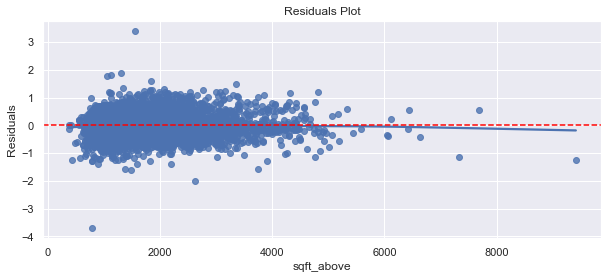

In [92]:
# Residuals Plot w/ sqft_above
plt.figure(figsize = (10,4))
sns.regplot(x=data[data.price>0].sqft_above, y=result_trans2.resid, lowess = True)
plt.axhline(0, linestyle ='--', color='red')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


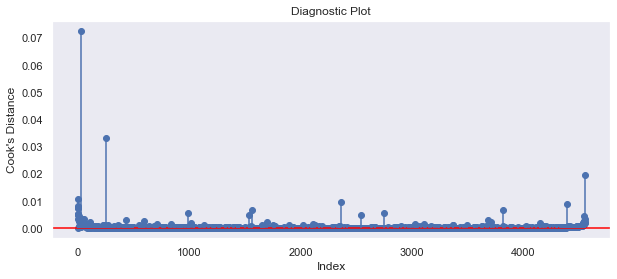

In [93]:
# Cook's distance
# Of model: trans1: np.log(price) ~ sqft_above
cooks_distance_2 = result_trans2.get_influence().cooks_distance
plt.figure(figsize = (10,4))
plt.scatter(data[data.price>0].index, cooks_distance_2[0])
plt.axhline(0, color = 'red')
plt.vlines(x=data[data.price>0].index, ymin=0, ymax=cooks_distance_2[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic Plot')
plt.grid()

In [94]:
a2=len(cooks_distance_2[0])
drop_indices=[i for i,v in enumerate(cooks_distance_2[0]) if v>(4/len(cooks_distance_2[0]))]
data_new_sqft_above=data.drop(drop_indices)
data_new_sqft_above

,DATE,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_group
0,7/3/14 0:00,0.590000,3,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,Below 1MN
10,6/11/14 0:00,2.888000,5,6.25,8670,64033,2.0,0,4,3,6120,2550,1965,2003,1MN-3MN
34,5/9/14 0:00,2.238888,5,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,1MN-3MN
76,5/27/14 0:00,1.710000,5,4.50,4590,14685,2.0,0,0,3,4590,0,2009,0,1MN-3MN
79,6/25/14 0:00,1.700000,5,3.50,5850,22885,2.0,0,2,4,4670,1180,1978,2000,1MN-3MN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7/1/14 0:00,0.000000,2,2.25,2130,4920,1.5,0,4,4,1530,600,1941,1998,NaN
4596,7/2/14 0:00,0.000000,4,2.50,4080,18362,2.0,0,2,4,4080,0,1983,0,NaN
4597,7/2/14 0:00,0.000000,3,1.00,1520,9030,1.0,0,0,3,1520,0,1956,2001,NaN
4598,7/2/14 0:00,0.000000,5,6.25,8020,21738,2.0,0,0,3,8020,0,2001,0,NaN


In [95]:
trans_new_sqft_above = smf.ols('np.log(price) ~ sqft_above', data = data_new_sqft_above[data_new_sqft_above.price>0])
result_trans_new_sqft_above = trans_new_sqft_above.fit()

result_trans_new_sqft_above.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     2078.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:47:49   Log-Likelihood:                -2113.3
No. Observations:                4370   AIC:                             4231.
Df Residuals:                    4368   BIC:                             4243.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3933      0.015    -93.602      0.000      -1.422      -1.364
sqft_above     0.0004    7.7e-06     45.590      0.000       0.000       0.000
==============================================================================
Omnibus:                       30.637   Durbin-Watson:                   0.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.955
Skew:                           0.050   Prob(JB):                     1.71e-05
Kurtosis:                       2.667   Cond. No.                     4.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Bootstrap
#### Sqft_living

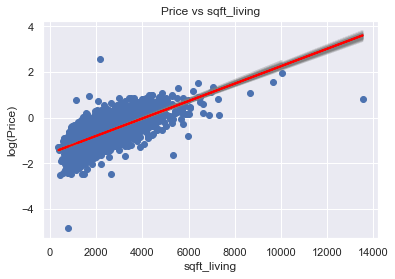

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm
data00 = data[data.price>0]
ols_mod1 = sm.ols(formula = 'np.log(price) ~ sqft_living', data=data00)
    
# resample with replacement each row
boot_slopes1 = []
boot_interc1 = []
boot_adjR21 = []
n_boots = 100
n_points = data00.shape[0]
plt.figure()
for _ in range(n_boots):
 # sample the rows, same size, with replacement
    sample_data00 = data00.sample(n=n_points, replace=True)
 # fit a linear regression
    ols_model_temp1 = sm.ols(formula = 'np.log(price) ~ sqft_living', data=sample_data00)
    results_temp1 = ols_model_temp1.fit()
 
 # append coefficients
    boot_interc1.append(results_temp1.params[0])
    boot_slopes1.append(results_temp1.params[1])
    boot_adjR21.append(results_temp1.rsquared_adj)
 
 # plot a greyed out line
    y_pred_temp1 = ols_model_temp1.fit().predict(sample_data00['sqft_living'])
    plt.plot(sample_data00['sqft_living'], y_pred_temp1, color='grey', alpha=0.2)
# add data points
y_pred1 = ols_mod1.fit().predict(data00['sqft_living'])
plt.scatter(data00['sqft_living'], np.log(data00['price']))
plt.plot(data00['sqft_living'], y_pred1, linewidth=2,color = 'red')
plt.grid(True)
plt.xlabel('sqft_living')
plt.ylabel('log(Price)')
plt.title('Price vs sqft_living')
plt.show()

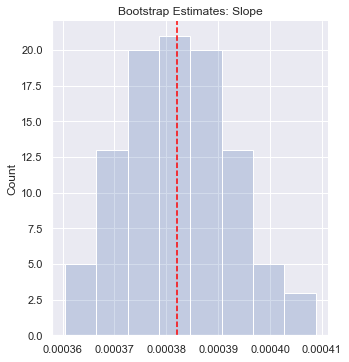

In [97]:
sns.displot(boot_slopes1, alpha = 0.25)
plt.axvline(x=result_trans1.params['sqft_living'],color='red', linestyle='--')
plt.title('Bootstrap Estimates: Slope')
plt.show()

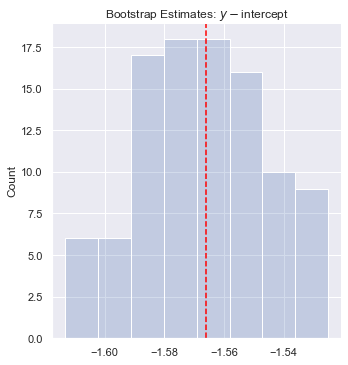

In [98]:
sns.displot(boot_interc1, alpha = 0.25)
plt.axvline(x=result_trans1.params['Intercept'],color='red', linestyle='--')
plt.title('Bootstrap Estimates: $y-$intercept')
plt.show()

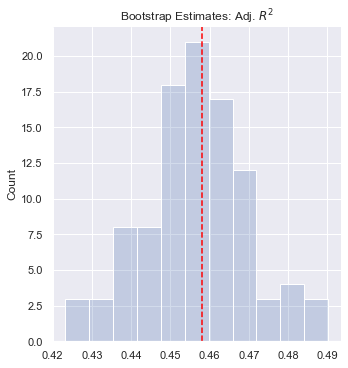

In [99]:
sns.displot(boot_adjR21, alpha = 0.25)
plt.axvline(x=0.458,color='red', linestyle='--')
plt.title('Bootstrap Estimates: Adj. $R^2$')
plt.show()

#### Sqft_above

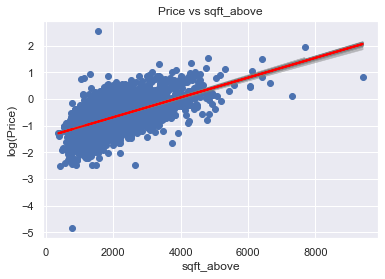

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

ols_mod2 = sm.ols(formula = 'np.log(price) ~ sqft_above', data=data00)
    
# resample with replacement each row
boot_slopes2 = []
boot_interc2 = []
boot_adjR22 = []
n_boots = 100
n_points = data00.shape[0]
plt.figure()
for _ in range(n_boots):
 # sample the rows, same size, with replacement
    sample_data00 = data00.sample(n=n_points, replace=True)
 # fit a linear regression
    ols_model_temp2 = sm.ols(formula = 'np.log(price) ~ sqft_above', data=sample_data00)
    results_temp2 = ols_model_temp2.fit()
 
 # append coefficients
    boot_interc2.append(results_temp2.params[0])
    boot_slopes2.append(results_temp2.params[1])
    boot_adjR22.append(results_temp2.rsquared_adj)
 
 # plot a greyed out line
    y_pred_temp2 = ols_model_temp2.fit().predict(sample_data00['sqft_above'])
    plt.plot(sample_data00['sqft_above'], y_pred_temp2, color='grey', alpha=0.2)
# add data points
y_pred2 = ols_mod2.fit().predict(data00['sqft_above'])
plt.scatter(data00['sqft_above'], np.log(data00['price']))
plt.plot(data00['sqft_above'], y_pred2, linewidth=2,color = 'red')
plt.grid(True)
plt.xlabel('sqft_above')
plt.ylabel('log(Price)')
plt.title('Price vs sqft_above')
plt.show()

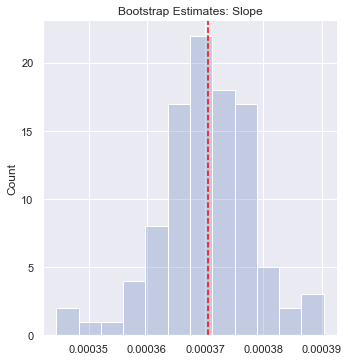

In [101]:
sns.displot(boot_slopes2, alpha = 0.25)
plt.axvline(x=result_trans2.params['sqft_above'],color='red', linestyle='--')
plt.title('Bootstrap Estimates: Slope')
plt.show()

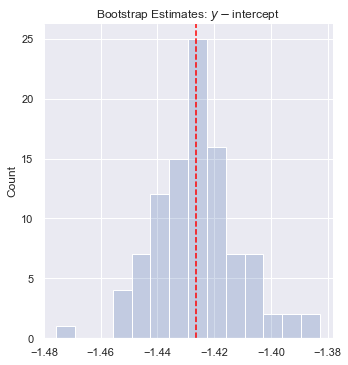

In [102]:
sns.displot(boot_interc2, alpha = 0.25)
plt.axvline(x=result_trans2.params['Intercept'],color='red', linestyle='--')
plt.title('Bootstrap Estimates: $y-$intercept')
plt.show()

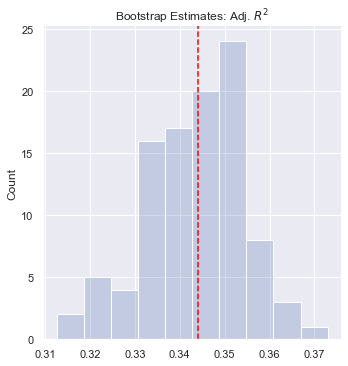

In [103]:
sns.displot(boot_adjR22, alpha = 0.25)
plt.axvline(x=0.344,color='red', linestyle='--')
plt.title('Bootstrap Estimates: Adj. $R^2$')
plt.show()

### Cross Validation
#### Sqft_living

In [104]:
# import KFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Test model: np.log(price) ~ sqft_living
data00 = data[data.price>0]
x1 = data00[['sqft_living']]
y1 = np.log(data00[['price']])
regr = LinearRegression()

scores1 = cross_val_score(regr, x1, y1, cv=5, scoring='neg_mean_squared_error')
print('5-Fold CV MSE Scores:', scores1)

5-Fold CV MSE Scores: [-0.43897428 -0.12696572 -0.08433157 -0.08924364 -0.49143217]


#### Sqft_above

In [105]:
# Test model: np.log(price) ~ sqft_above

data00 = data[data.price>0]
x2 = data00[['sqft_above']]
y2 = np.log(data00[['price']])
regr = LinearRegression()

scores2 = cross_val_score(regr, x2, y2, cv=5, scoring='neg_mean_squared_error')
print('5-Fold CV MSE Scores:', scores2)

5-Fold CV MSE Scores: [-0.60250489 -0.1501002  -0.079413   -0.10142368 -0.58631426]


### Model testing with Train and Test Data Set
#### Sqft_living

In [106]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits = 3)
for train_index, test_index in kf.split(data00):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    # split the data into 5 subsets
kf = KFold(n_splits = 5)

mse = []
for train_index, test_index in kf.split(data00):
    # train data over training set
    results = smf.ols('np.log(price) ~ sqft_living', data00.iloc[train_index]).fit()
    
    # test over last split 
    s = ((np.log(data00.iloc[test_index]["price"]) - results.predict(data00.iloc[test_index]))**2).mean()
    
    # append test metric
    mse.append(s)

TRAIN: [1517 1518 1519 ... 4548 4549 4550] TEST: [   0    1    2 ... 1514 1515 1516]
TRAIN: [   0    1    2 ... 4548 4549 4550] TEST: [1517 1518 1519 ... 3031 3032 3033]
TRAIN: [   0    1    2 ... 3031 3032 3033] TEST: [3034 3035 3036 ... 4548 4549 4550]


In [107]:
mse

[0.4389742841083304,
 0.1269657184829876,
 0.08433156718945052,
 0.08924364309405831,
 0.4914321730686307]

In [108]:
reg = smf.ols('np.log(price) ~ sqft_living', data = data00)
results = reg.fit()
(results.resid**2).mean()

0.15764460958455562

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

x = np.log(data00[['sqft_living']])
y = data00[['price']]

regr = LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_mean_squared_error')
print('5-Fold CV MSE Scores:', scores)

5-Fold CV MSE Scores: [-0.69239425 -0.02968398 -0.04054664 -0.05824521 -0.05764291]


#### Sqft_above

In [110]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits = 3)
for train_index, test_index in kf.split(data00):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    # split the data into 5 subsets
kf = KFold(n_splits = 5)

mse = []
for train_index, test_index in kf.split(data00):
    # train data over training set
    results = smf.ols('np.log(price) ~ sqft_above', data00.iloc[train_index]).fit()
    
    # test over last split 
    s = ((np.log(data00.iloc[test_index]["price"]) - results.predict(data00.iloc[test_index]))**2).mean()
    
    # append test metric
    mse.append(s)

TRAIN: [1517 1518 1519 ... 4548 4549 4550] TEST: [   0    1    2 ... 1514 1515 1516]
TRAIN: [   0    1    2 ... 4548 4549 4550] TEST: [1517 1518 1519 ... 3031 3032 3033]
TRAIN: [   0    1    2 ... 3031 3032 3033] TEST: [3034 3035 3036 ... 4548 4549 4550]


In [111]:
mse

[0.6025048851420913,
 0.15010019673990344,
 0.07941299928782021,
 0.10142368400149906,
 0.5863142626282548]

In [112]:
reg = smf.ols('np.log(price) ~ sqft_above', data = data00)
results = reg.fit()
(results.resid**2).mean()

0.19082024907561204

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

x = np.log(data00[['sqft_above']])
y = data00[['price']]

regr = LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_mean_squared_error')
print('5-Fold CV MSE Scores:', scores)

5-Fold CV MSE Scores: [-0.73524046 -0.03670108 -0.03879007 -0.05685297 -0.07616706]


### Prediction

#### Sqft_living

In [114]:
for train_index, test_index in kf.split(data00):
    # train data over training set
    results_test_living = smf.ols('np.log(price) ~ sqft_living', data00.iloc[test_index]).fit()

In [115]:
data_test_living=data00.iloc[test_index]

In [116]:
# get xrange
xrange = np.linspace(data_test_living.sqft_living.min(), data_test_living.sqft_living.max(), 200)

# Put in format that works with get_predictions()
new_data = pd.DataFrame(xrange, columns = ["sqft_living"])

# Generate predictions over range
predictions = results_test_living.get_prediction(new_data)

# Generate table with intervals for each x
predictions = predictions.summary_frame(alpha=0.05)

In [117]:
predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-1.648754,0.019584,-1.687190,-1.610318,-2.129900,-1.167607
1,-1.644689,0.019214,-1.682399,-1.606979,-2.125778,-1.163600
2,-1.640624,0.018846,-1.677611,-1.603638,-2.121657,-1.159591
3,-1.636560,0.018479,-1.672826,-1.600293,-2.117538,-1.155582
4,-1.632495,0.018114,-1.668045,-1.596945,-2.113419,-1.151570
...,...,...,...,...,...,...
195,-0.856143,0.062105,-0.978030,-0.734256,-1.350997,-0.361289
196,-0.852078,0.062509,-0.974757,-0.729399,-1.347129,-0.357028
197,-0.848014,0.062913,-0.971485,-0.724542,-1.343261,-0.352766
198,-0.843949,0.063317,-0.968213,-0.719685,-1.339394,-0.348504


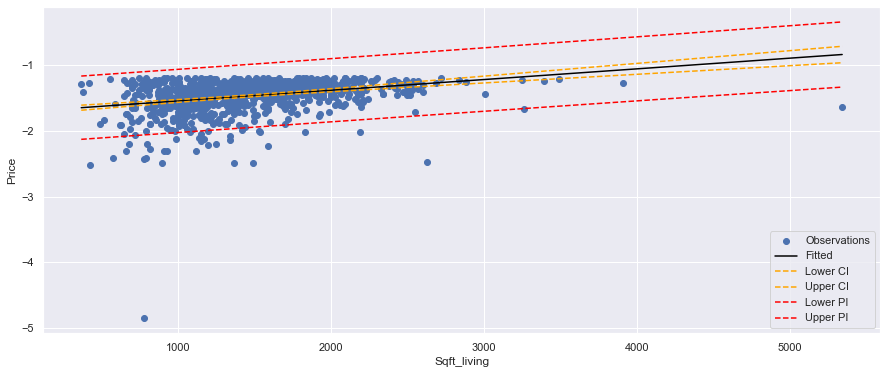

In [118]:
plt.figure(figsize = (15, 6))
plt.scatter(data_test_living.sqft_living, np.log(data_test_living.price))
plt.plot(xrange, predictions["mean"], color = "black")

plt.xlabel("Sqft_living")
plt.ylabel("Price")

# confidence Intervals
plt.plot(xrange, predictions["mean_ci_lower"], color = "orange", linestyle = '--')
plt.plot(xrange, predictions["mean_ci_upper"], color = "orange", linestyle = '--')

# prediction Intervals
plt.plot(xrange, predictions["obs_ci_lower"], color = "red", linestyle = '--')
plt.plot(xrange, predictions["obs_ci_upper"], color = "red", linestyle = '--')

plt.legend(["Observations", "Fitted", "Lower CI", "Upper CI","Lower PI", "Upper PI"])

#### Sqft_above

In [119]:
for train_index, test_index in kf.split(data00):
    # train data over training set
    results_test_above = smf.ols('np.log(price) ~ sqft_above', data00.iloc[test_index]).fit()

In [120]:
data_test_above=data00.iloc[test_index]

In [121]:
# get xrange
xrange = np.linspace(data_test_above.sqft_above.min(), data_test_above.sqft_above.max(), 200)

# Put in format that works with get_predictions()
new_data = pd.DataFrame(xrange, columns = ["sqft_above"])

# Generate predictions over range
predictions = results_test_above.get_prediction(new_data)

# Generate table with intervals for each x
predictions = predictions.summary_frame(alpha=0.05)

In [122]:
predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-1.611572,0.019700,-1.650235,-1.572910,-2.101932,-1.121213
1,-1.608900,0.019392,-1.646958,-1.570841,-2.099212,-1.118587
2,-1.606227,0.019085,-1.643683,-1.568770,-2.096492,-1.115961
3,-1.603554,0.018780,-1.640411,-1.566697,-2.093774,-1.113334
4,-1.600881,0.018475,-1.637140,-1.564621,-2.091057,-1.110705
...,...,...,...,...,...,...
195,-1.090360,0.049025,-1.186575,-0.994145,-1.588572,-0.592149
196,-1.087687,0.049359,-1.184559,-0.990816,-1.586026,-0.589349
197,-1.085015,0.049694,-1.182543,-0.987486,-1.583482,-0.586548
198,-1.082342,0.050029,-1.180528,-0.984156,-1.580938,-0.583746


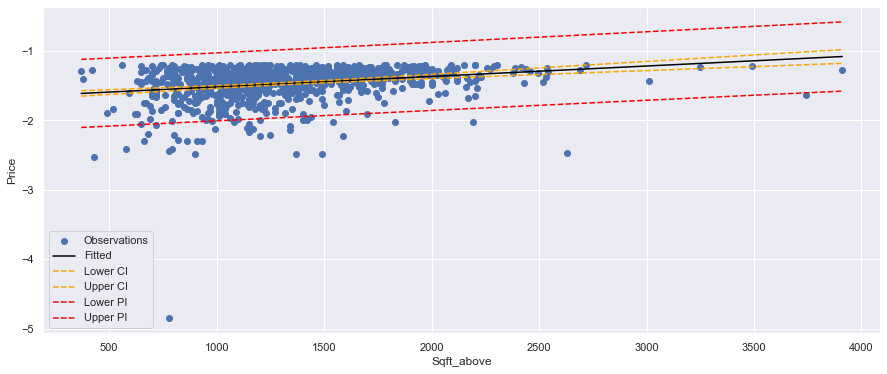

In [123]:
plt.figure(figsize = (15, 6))
plt.scatter(data_test_above.sqft_above, np.log(data_test_above.price))
plt.plot(xrange, predictions["mean"], color = "black")

plt.xlabel("Sqft_above")
plt.ylabel("Price")

# confidence Intervals
plt.plot(xrange, predictions["mean_ci_lower"], color = "orange", linestyle = '--')
plt.plot(xrange, predictions["mean_ci_upper"], color = "orange", linestyle = '--')

# prediction Intervals
plt.plot(xrange, predictions["obs_ci_lower"], color = "red", linestyle = '--')
plt.plot(xrange, predictions["obs_ci_upper"], color = "red", linestyle = '--')

plt.legend(["Observations", "Fitted", "Lower CI", "Upper CI","Lower PI", "Upper PI"])